In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy.random import randint
from multiprocessing import cpu_count
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = 'C:\\Users\\0913h\\PycharmProjects\\Credit_Risk'

In [2]:
# Data import function reducing memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)


    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
# Data imported
train = import_data('train_base.csv')
static = import_data('train_static_0_0.csv')
static1 = import_data('train_static_0_1.csv')
#test = import_data(path + 'test/test_base.csv')

Memory usage of dataframe is 58.24 MB
Memory usage after optimization is: 26.21 MB
Decreased by 55.0%
Memory usage of dataframe is 1279.85 MB
Memory usage after optimization is: 599.24 MB
Decreased by 53.2%
Memory usage of dataframe is 666.73 MB
Memory usage after optimization is: 312.17 MB
Decreased by 53.2%


In [4]:
# Summary table of train
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 50% : ',len(missings[missings>0.5]))
info(train)


 the shape of the table is : 
 (1526659, 5)
--------------------------------------------------------------------------------

 data types :  object    1
int32     2
int8      2
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  0
--------------------------------------------------------------------------------

 missing data in the table: 
 Series([], dtype: float64)
--------------------------------------------------------------------------------
Series([], dtype: float64)
--------------------------------------------------------------------------------

 missing data over 50% :  0


In [5]:
static.head()

,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,...,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
0,0,NaN,NaN,1917.599976,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,BO,NaN,NaN
1,1,NaN,NaN,3134.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,BO,NaN,NaN
2,2,NaN,NaN,4937.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,BO,AL,NaN
3,3,NaN,NaN,4643.600098,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,1.0,NaN,NaN,0.0,0.0,NaN,BO,AL,NaN
4,4,NaN,NaN,3390.199951,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,BO,AL,NaN


In [6]:
static[pd.isna(static['avgdbddpdlast24m_3658932P'])== False]

,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,...,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
14,14,0.0,NaN,2484.800049,0.000000,0.0,0.0,2.0,0.0,0.0,...,1.0,2.0,0.000000,NaN,0.000000,12560.000000,NaN,FO,AL,NaN
20,20,0.0,NaN,6000.000000,3979.400146,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,35748.601562,NaN,35748.601562,12000.000000,NaN,FO,AL,NaN
69,69,0.0,NaN,2400.000000,0.000000,0.0,0.0,3.0,100.0,28.0,...,0.0,1.0,0.000000,NaN,0.000000,12040.000000,NaN,FO,AL,NaN
103,103,0.0,NaN,2192.400146,0.000000,0.0,2.0,0.0,0.0,0.0,...,2.0,2.0,0.000000,NaN,0.000000,3760.000000,NaN,FO,NaN,NaN
105,105,0.0,NaN,5061.000000,5141.800293,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,138781.609375,NaN,138781.609375,15460.000000,NaN,FO,AL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003752,2651088,0.0,117624.789062,3045.000000,4488.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44848.000000,44848.000000,44848.000000,199664.671875,8976.000000,FO,NaN,2019-11-12
1003753,2651089,0.0,134887.406250,1200.000000,4382.800293,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,39392.000000,39392.000000,39392.000000,209840.000000,8765.600586,FO,NaN,2019-11-12
1003754,2651090,0.0,69186.617188,6000.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,76455.617188,NaN,FO,NaN,2019-11-12
1003755,2651091,0.0,117331.000000,11565.400391,13781.200195,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,55084.402344,55084.402344,55084.402344,168248.312500,13781.200195,FO,NaN,2019-11-30


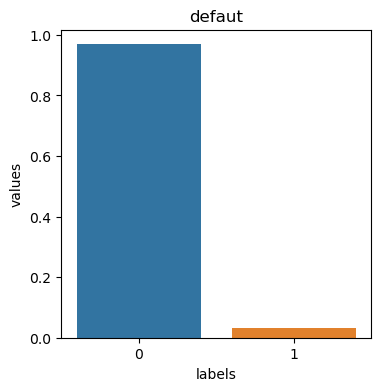

In [7]:
# Default ratio
temp = train.target.value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(train)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

In [8]:
df_st = pd.concat([static,static1])
train_m = pd.merge(train, df_st, on="case_id")

In [9]:
train_m.describe()

,case_id,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,...,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A
count,1.526659e+06,1.526659e+06,1.526659e+06,1.526659e+06,1108481.0,9.655350e+05,1.526659e+06,1.526655e+06,1.526659e+06,1526659.0,...,1.394771e+06,1.345537e+06,1.303419e+06,1526659.0,1526659.0,1.081339e+06,6.860130e+05,1.526656e+06,1.526655e+06,352448.000000
mean,1.286077e+06,2.019363e+05,4.076904e+01,3.143728e-02,NaN,5.595832e+04,4.039207e+03,1.435775e+03,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,3.446498e+04,NaN,NaN,2.768126e+04,2.830974e+04,1.968312e+04,9.223816e+04,10411.375000
std,7.189466e+05,4.473597e+01,2.379798e+01,1.744964e-01,NaN,7.164705e+04,3.005977e+03,2.810673e+03,8.132935e-03,0.0,...,8.935547e-02,1.722412e-01,3.449231e+04,0.0,0.0,5.854328e+04,6.050792e+04,5.059776e+04,1.623068e+05,16221.500977
min,0.000000e+00,2.019010e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,8.080000e+01,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,-2.504400e+04,-2.504400e+04,0.000000e+00,0.000000e+00,0.214000
25%,7.661975e+05,2.019060e+05,2.300000e+01,0.000000e+00,0.0,7.419200e+03,1.967600e+03,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,1.380000e+04,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3309.313965
50%,1.357358e+06,2.019100e+05,4.000000e+01,0.000000e+00,0.0,2.975840e+04,3.151800e+03,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,2.515600e+04,0.0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,3.597766e+04,6221.200195
75%,1.739022e+06,2.020010e+05,5.500000e+01,0.000000e+00,0.0,7.630295e+04,5.231400e+03,2.029400e+03,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,4.532000e+04,0.0,2.0,2.799400e+04,2.798400e+04,1.349310e+04,1.188157e+05,11685.000000
max,2.703454e+06,2.020100e+05,9.100000e+01,1.000000e+00,4208.0,1.408010e+06,1.060070e+05,8.750000e+04,5.000000e+00,28.0,...,1.000000e+00,1.000000e+00,7.618674e+05,8.0,102.0,1.210629e+06,1.085048e+06,1.210629e+06,4.803504e+07,794899.187500


# Numerical Features

In [10]:
# Target density function on feature
def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['target'] != 0]
    t0 = df.loc[df['target'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(5, 5, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'target':
            i += 1
            plt.subplot(5, 5, i)
            sns.kdeplot(t1[feature], bw=0.5, color='red', label="default")
            sns.kdeplot(t0[feature], bw=0.5, label="target = 0")
            plt.ylabel('Density plot', fontsize=8)
            plt.xlabel(feature, fontsize=8)
            plt.xticks(fontsize=8, rotation=90)  # Set the font size for x-axis labels
            plt.yticks(fontsize=8)  # Set the font size for y-axis labels

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

In [ ]:
train_m_num = train_m.select_dtypes(['int8','int16','float16','int32','float32','int64','float64']).columns[1:-1]
train_m_fea = train_m_num.drop(['target','sellerplacecnt_915L','sellerplacescnt_216L','sumoutstandtotal_3546847A','sumoutstandtotalest_4493215A','posfpd30lastmonth_3976960P'])

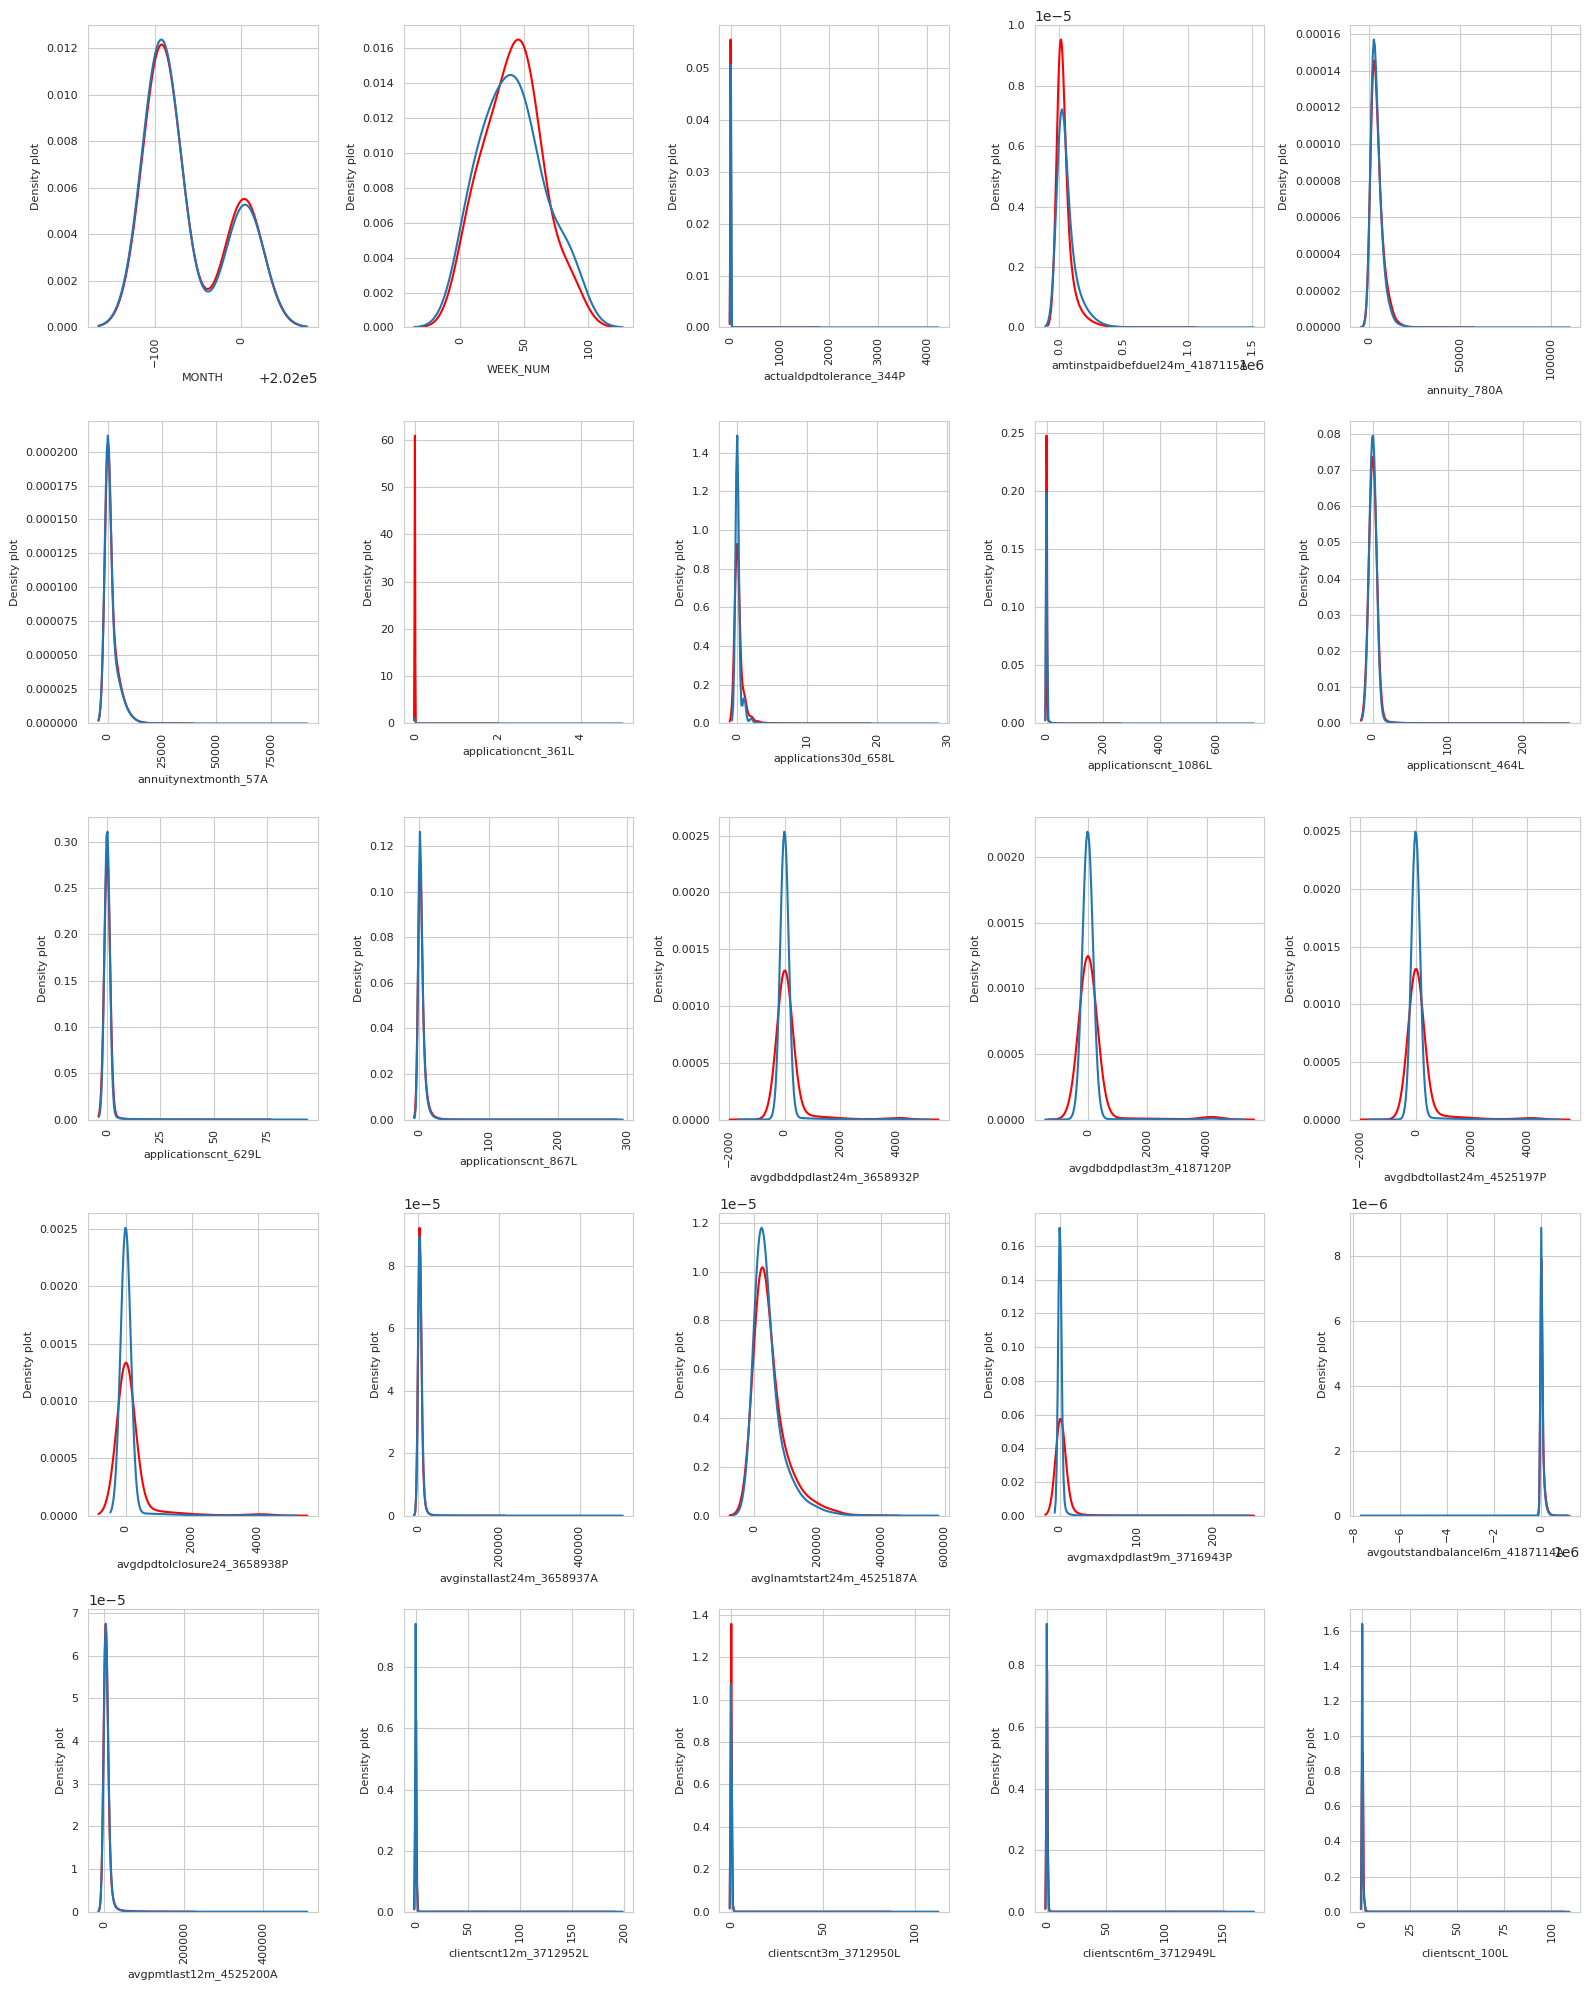

In [ ]:
plot_distribution(train_m,train_m_fea[:25])

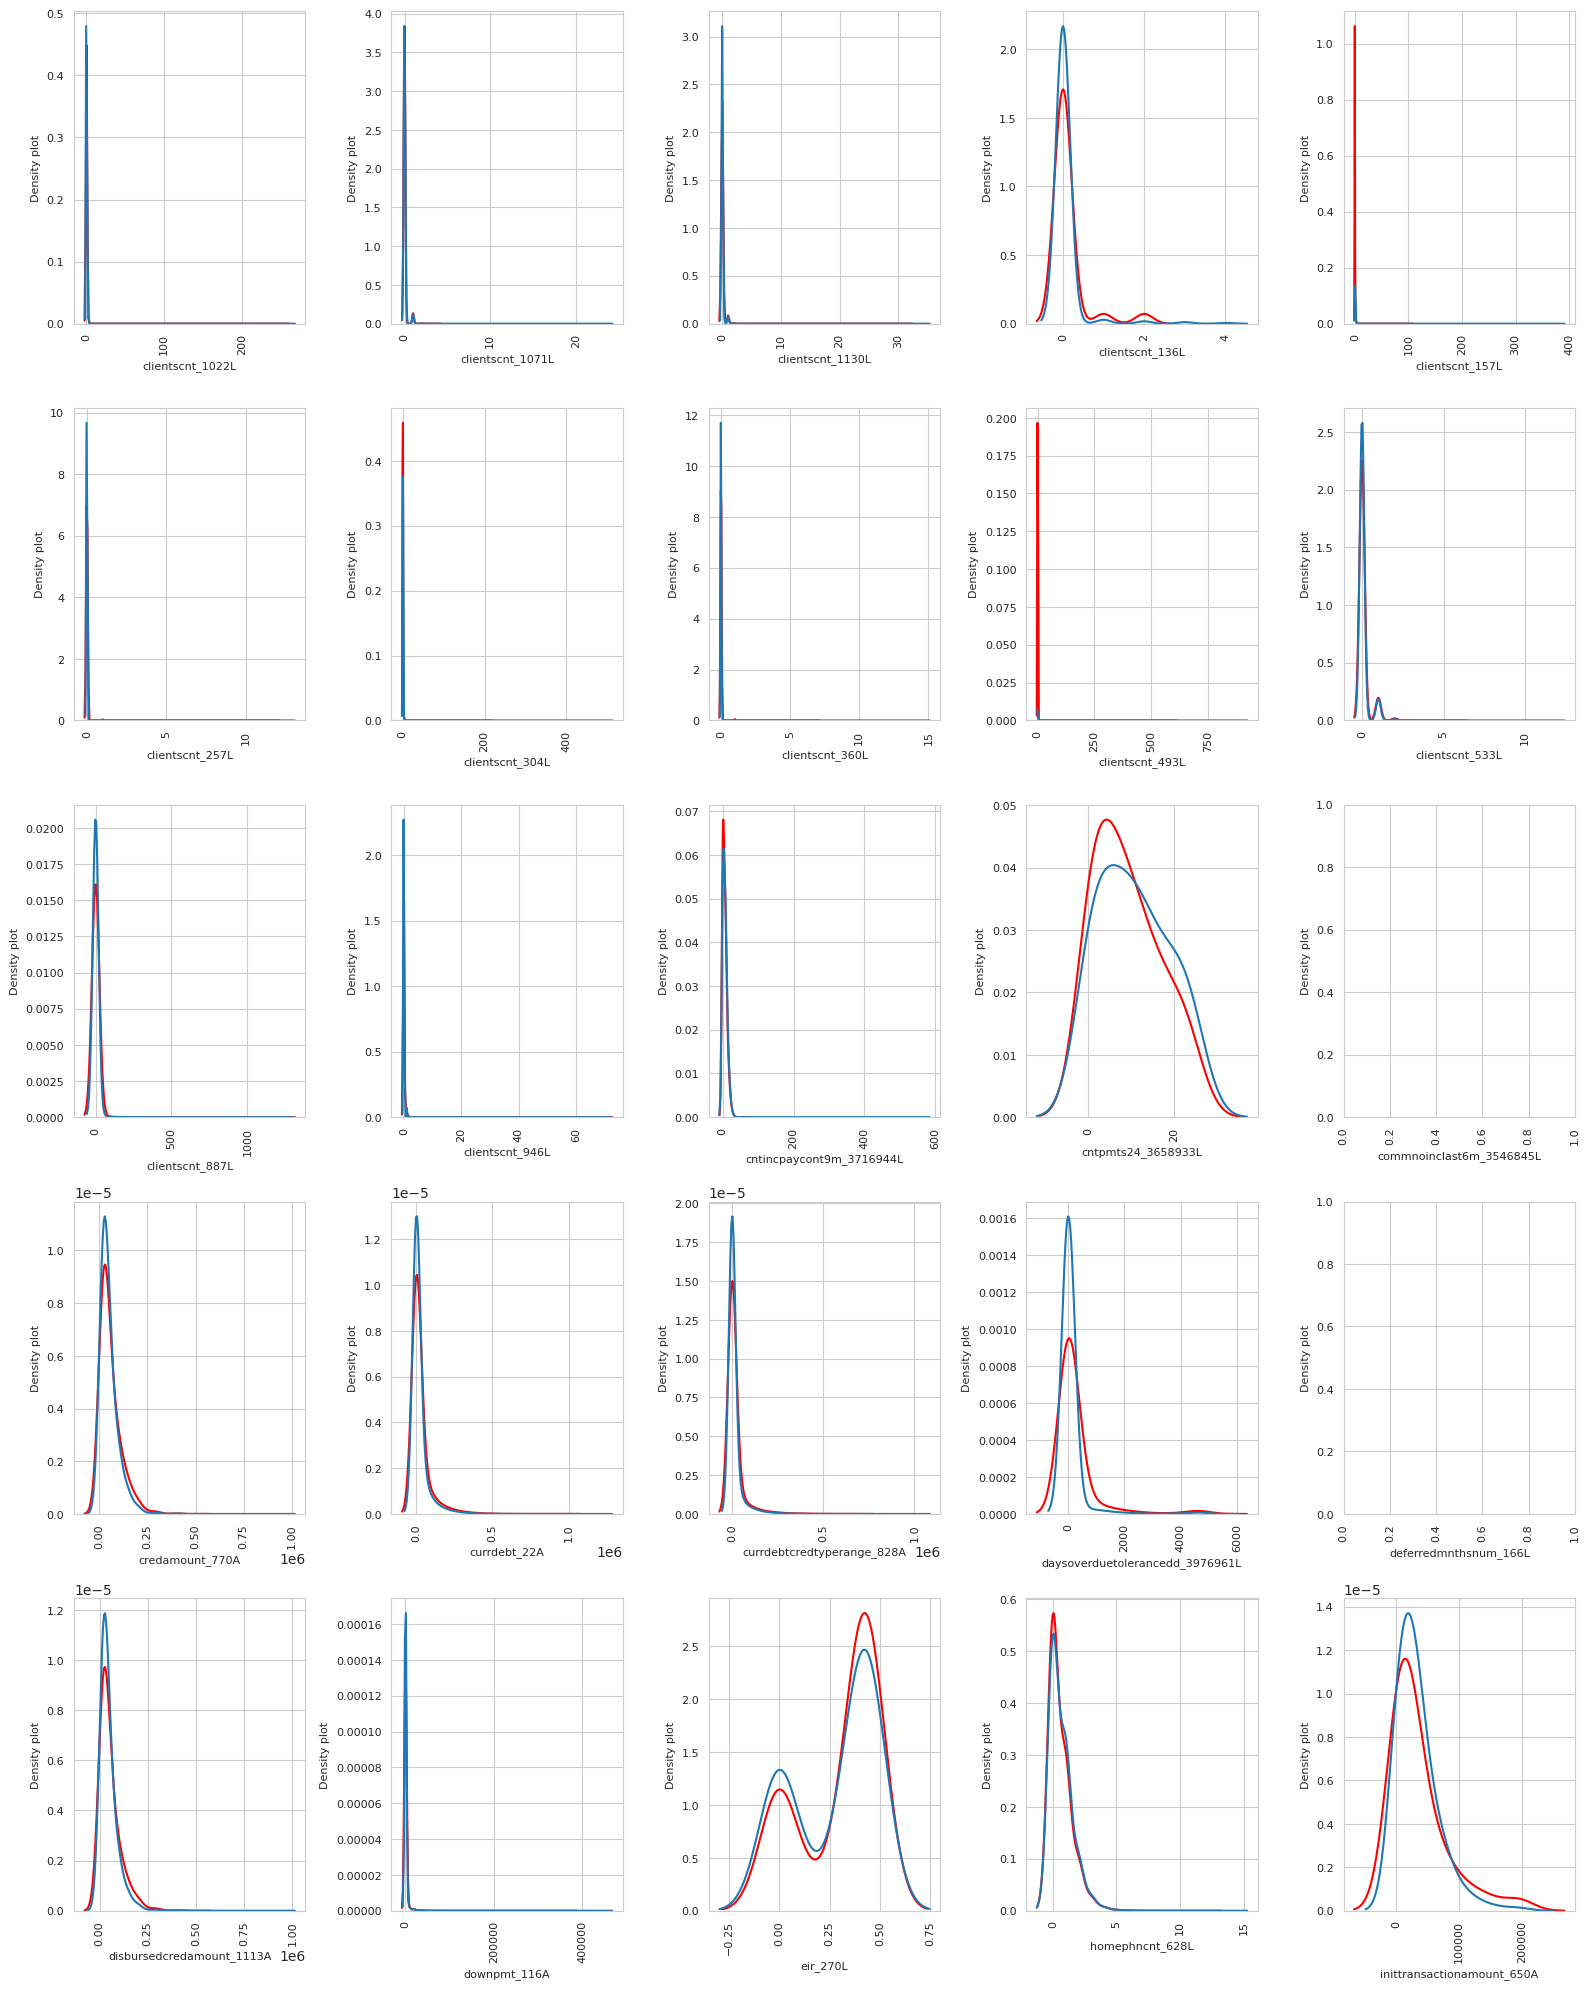

In [ ]:
plot_distribution(train_m,train_m_fea[25:50]) #daysoverduetolerancedd_3976961L,inittransactionamount650A,cntpmts24_3658933L,credamount_770A,currdebt_22A,currdebtcredtyperange_828A
# disbursedcredamount_1113A,cntpmts24_3658933L
# clientscnt's impact?? eir270L??
# Missing

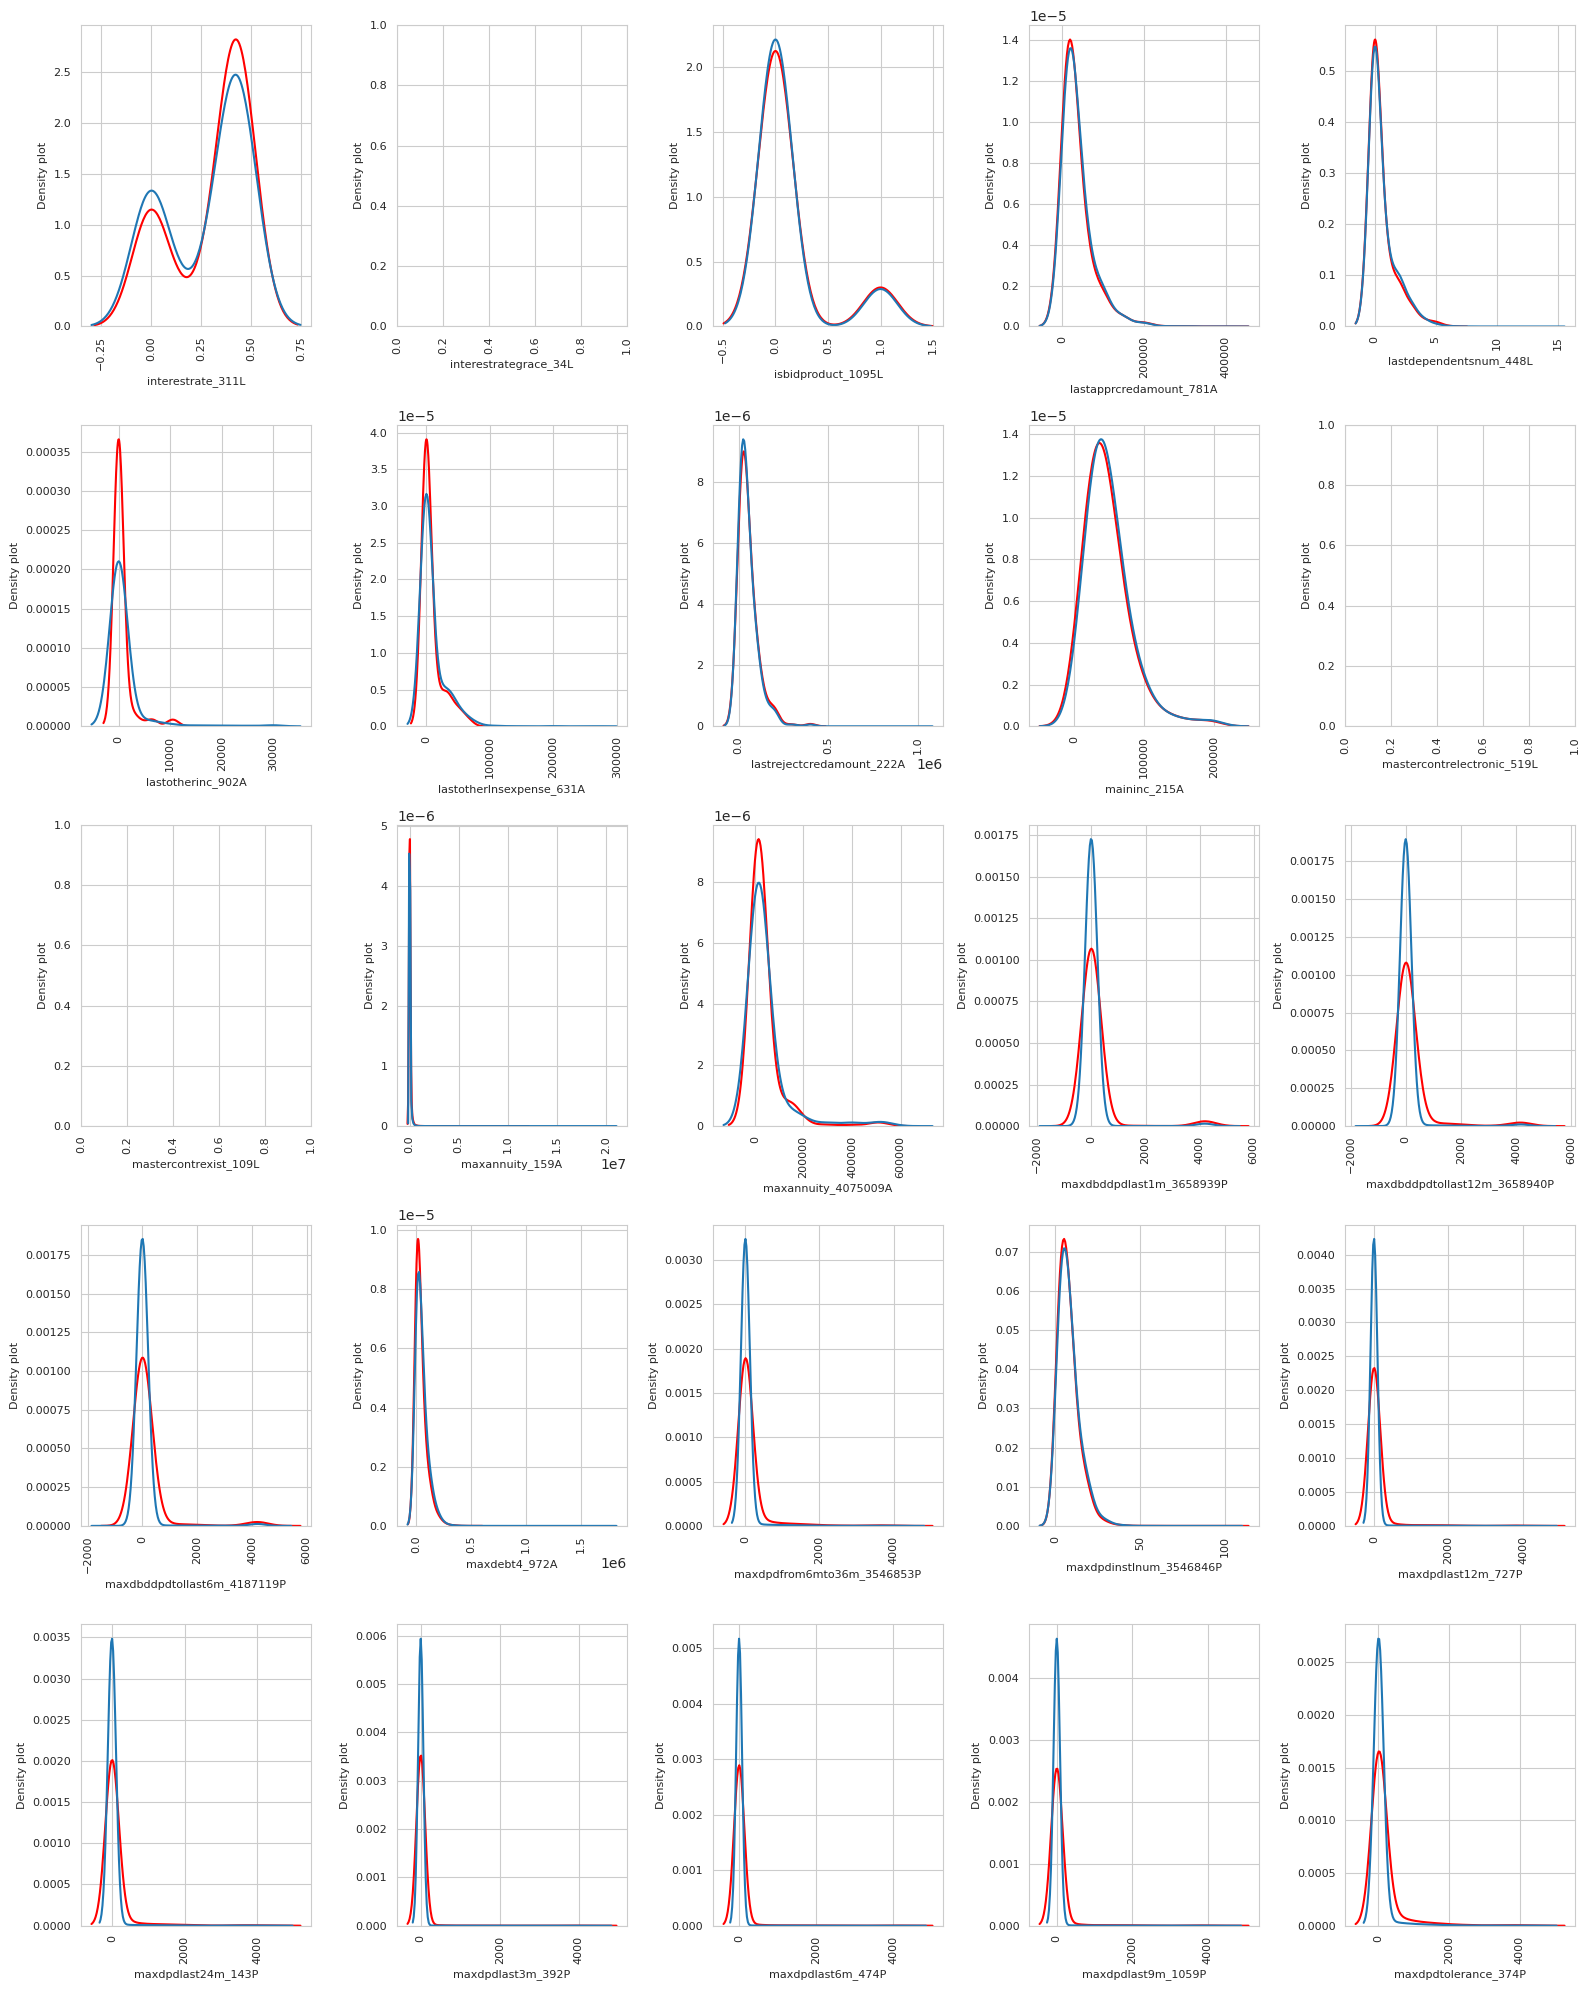

In [ ]:
plot_distribution(train_m,train_m_fea[50:75])

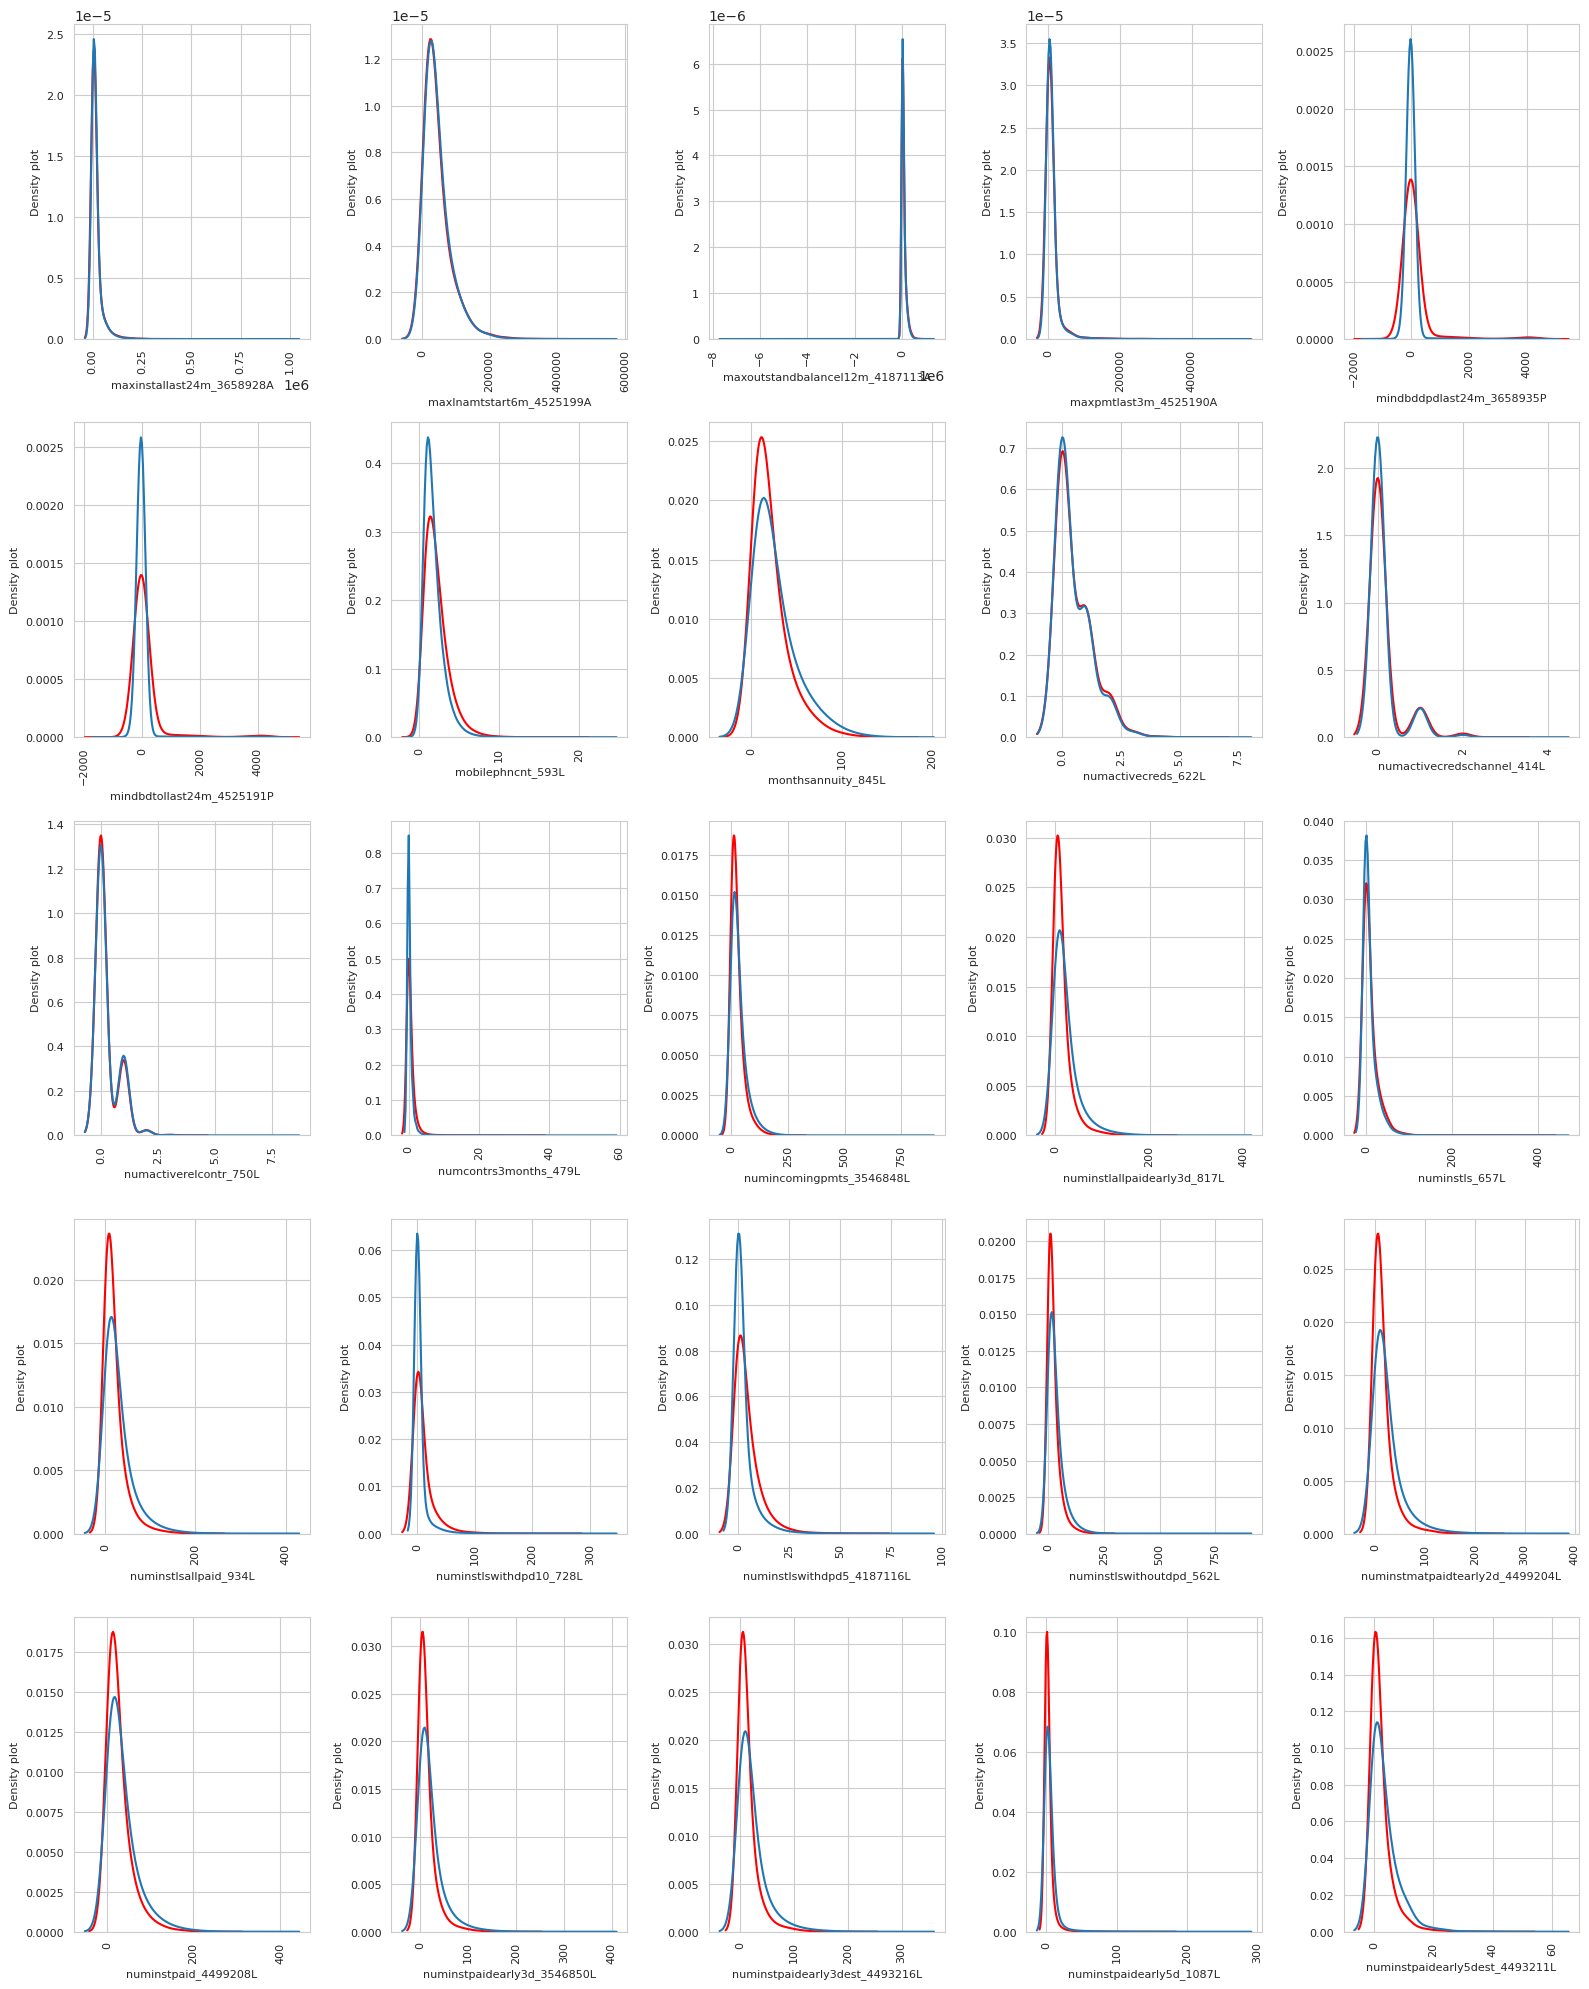

In [ ]:
plot_distribution(train_m,train_m_fea[75:100])

In [ ]:
len(train_m_fea) # Missing features? correlations?

125

In [ ]:
# Drop features

# Categorical Features

In [11]:
train_m.select_dtypes('O').nunique().sort_values()

typesuite_864L                 1
bankacctype_710L               1
isdebitcard_729L               1
paytype1st_925L                1
paytype_783L                   1
                            ... 
datelastunpaid_3546854D     5231
maxdpdinstldate_3546855D    5287
lastrejectdate_50D          5374
lastapplicationdate_877D    5381
lastapprdate_640D           5389
Length: 39, dtype: int64

In [12]:
catfeatures = ['bankacctype_710L','isdebitcard_729L','paytype1st_925L','paytype_783L','lastrejectreason_759M','credtype_322L']

In [13]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['target'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['target'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

        sns.set_color_codes("pastel")

        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

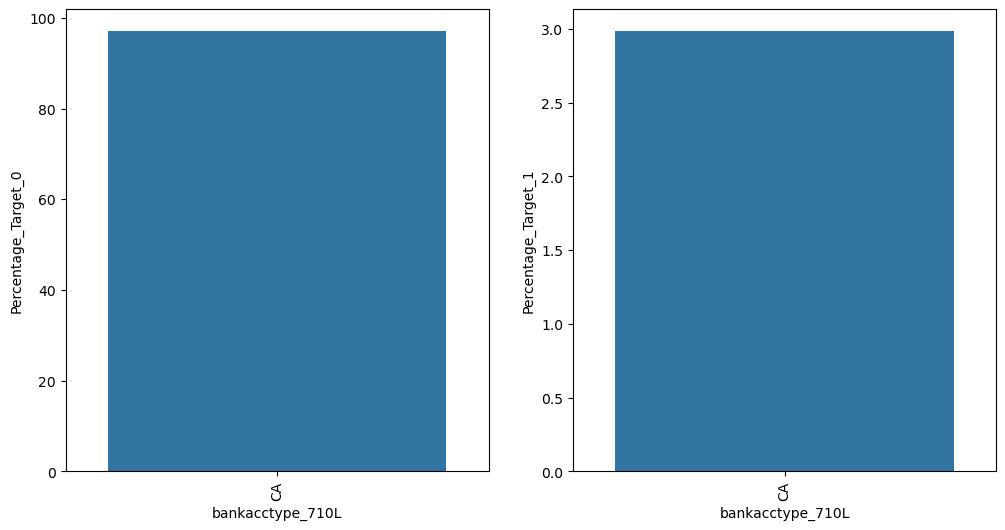

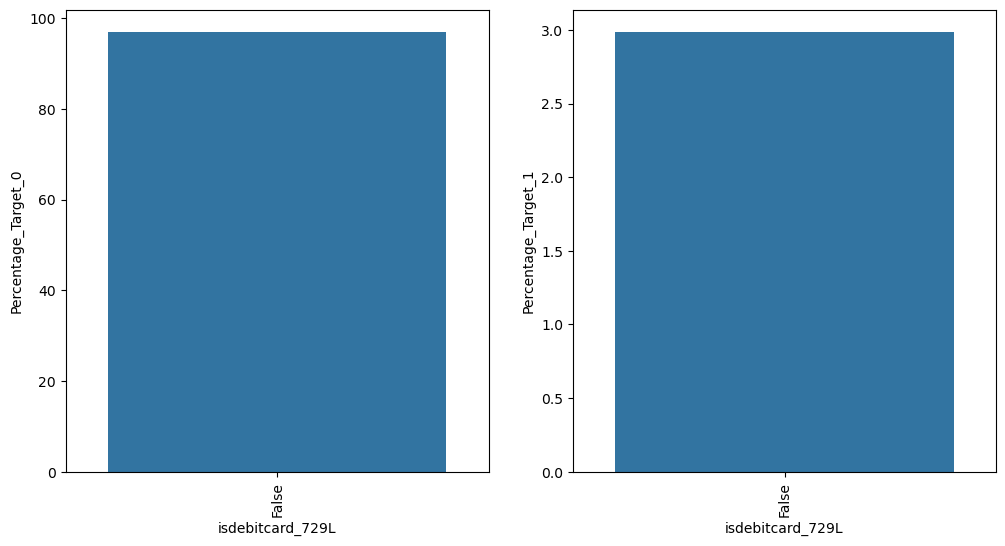

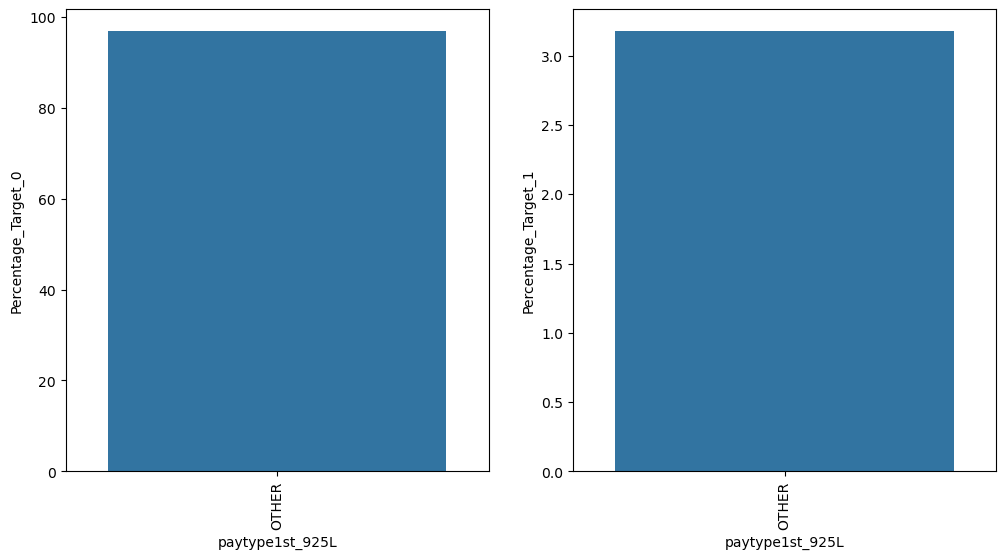

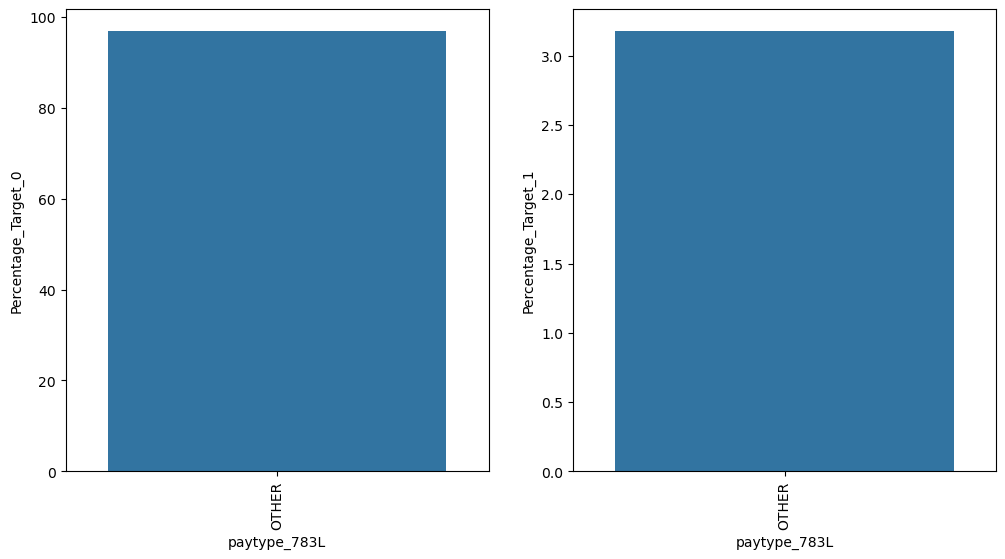

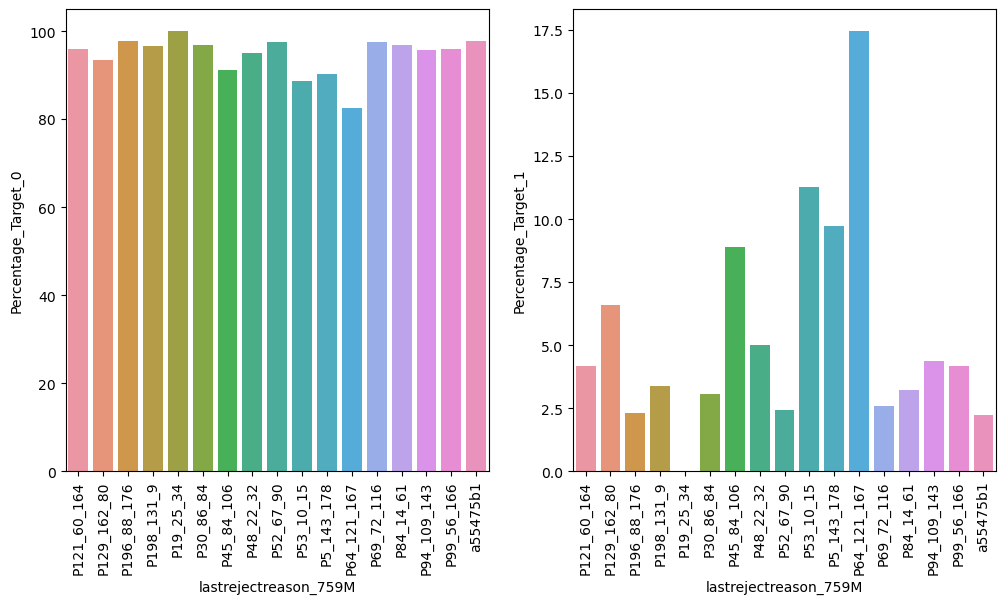

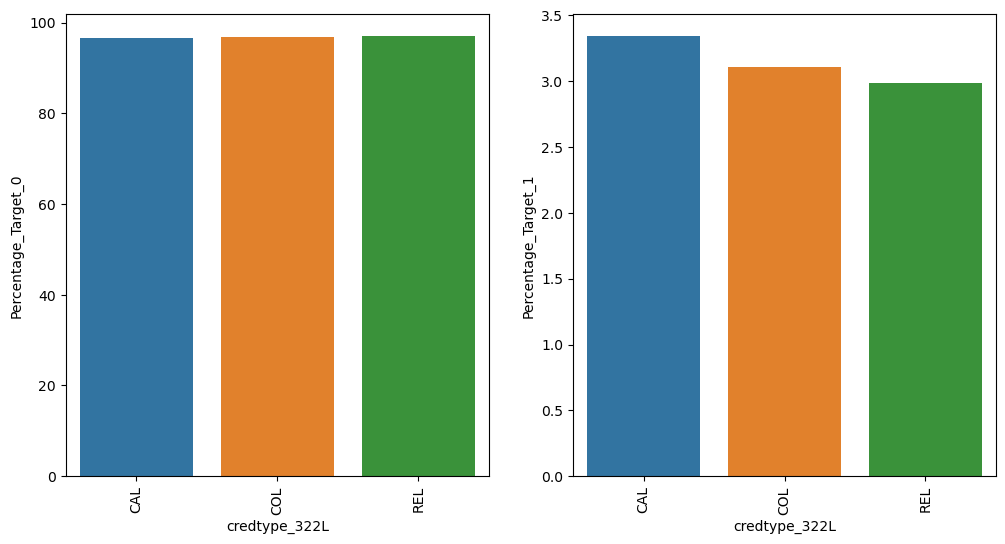

In [14]:
cat_stats(train_m,catfeatures)
# lastrejectreason_759M: P64_121_167 (H) P53_10_15 (2H) P5_143_178,P45_84_106 (3H) P129_162_80 (4H) P19_25_34 (0?) o.w.

In [ ]:
# Perform chi-squared test
def chi2_test(df):
    chi2_stat_list=[]; p_val_list=[]; dof_list=[]; ex_list=[]
    for var in df.columns:
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(train_m['target'], train_m[var]))
        chi2_stat_list.append(chi2_stat); p_val_list.append(p_val); dof_list.append(dof); ex_list.append(ex);
    chi_squared=pd.DataFrame({'variable':df.columns,'dof':dof_list,'chi2_stat':chi2_stat_list,'p_val':p_val_list})
    chi_squared.set_index('variable',inplace=True)
    print(chi_squared.sort_values(by='p_val',ascending=True))

In [ ]:
chi2_test(train_m.select_dtypes('O'))
# Lower p-values mean significant correlation exists. However, 'date' columns might have entries that are just all different for each case_id.
# That might lead the feature to have low p_val while not really being meaningful.

                                  dof     chi2_stat          p_val
variable                                                          
date_decision                     643   4945.504319   0.000000e+00
lastcancelreason_561M              73   8393.161991   0.000000e+00
lastdelinqdate_224D              4400  10301.676992   0.000000e+00
firstclxcampaign_1125D           1247   5659.910577   0.000000e+00
lastrejectcommoditycat_161M        44   1688.650374   0.000000e+00
lastrejectreasonclient_4145040M    13   7618.319950   0.000000e+00
lastrejectreason_759M              17  12062.877657   0.000000e+00
lastst_736L                        10   6745.979326   0.000000e+00
datefirstoffer_1144D             1403   3943.553008  1.257829e-239
previouscontdistrict_112M         222   1768.008783  1.118075e-238
datelastunpaid_3546854D          5230   8547.013188  4.184583e-165
lastapprcommoditycat_1041M         44    769.559824  3.145061e-133
lastrejectdate_50D               5373   8143.794855  5.143561e

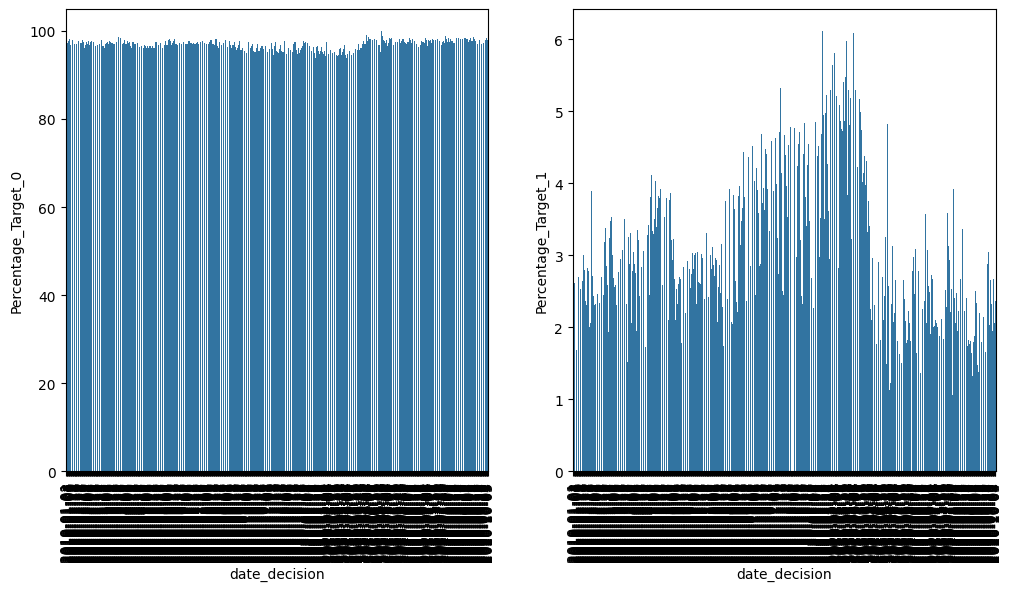

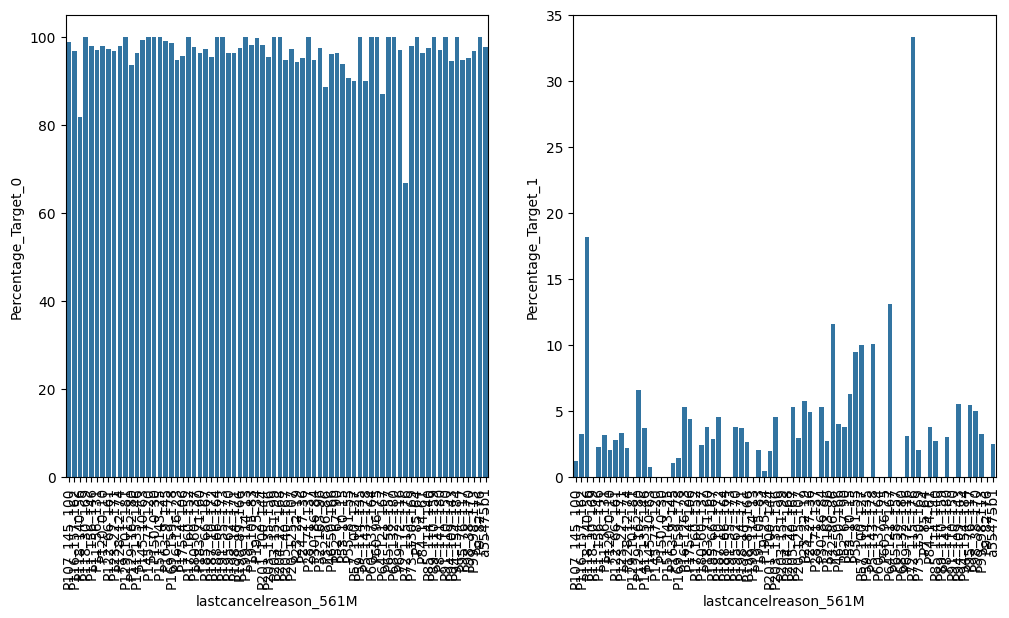

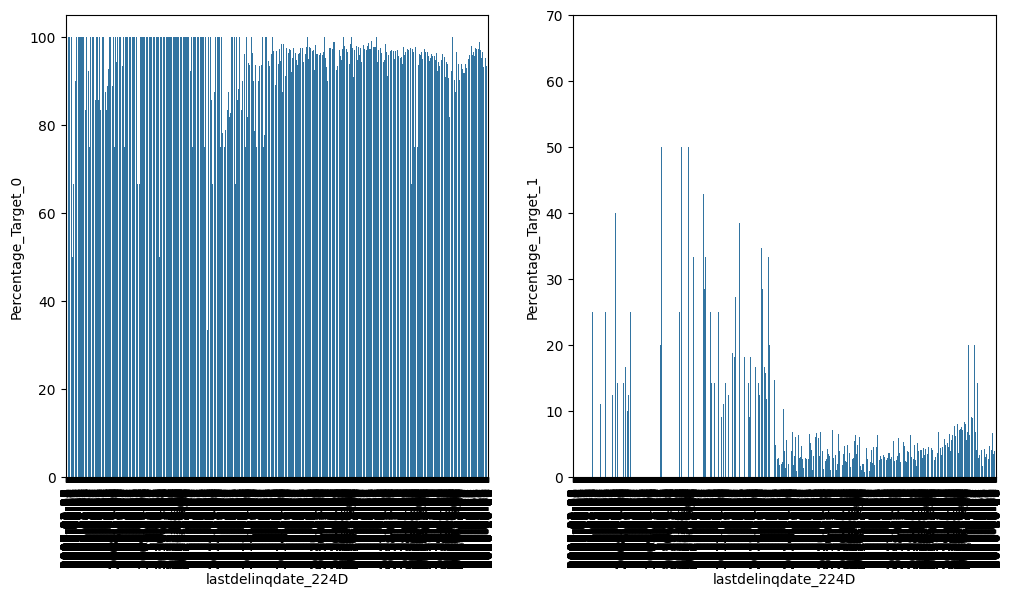

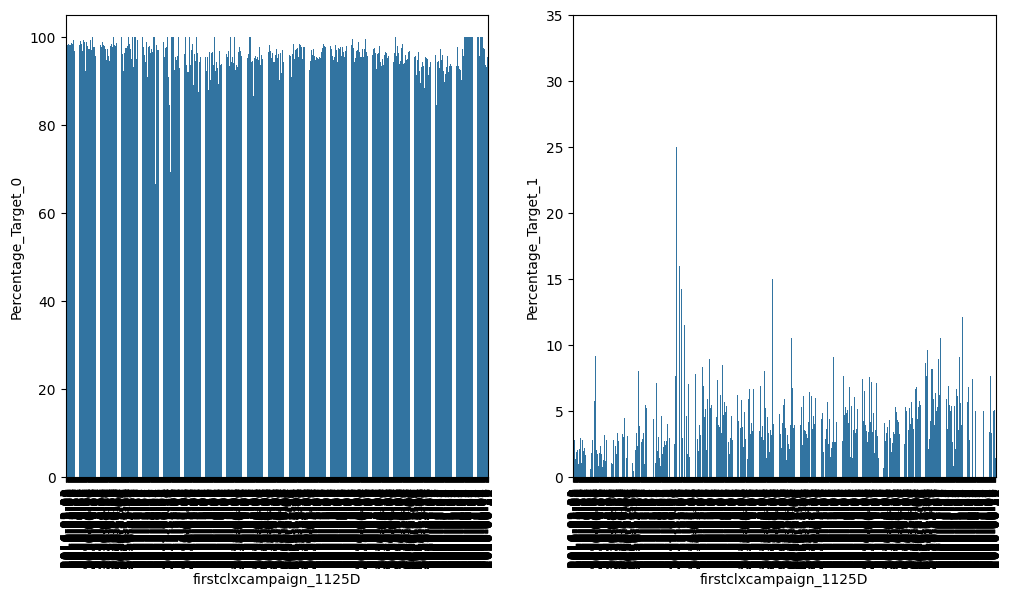

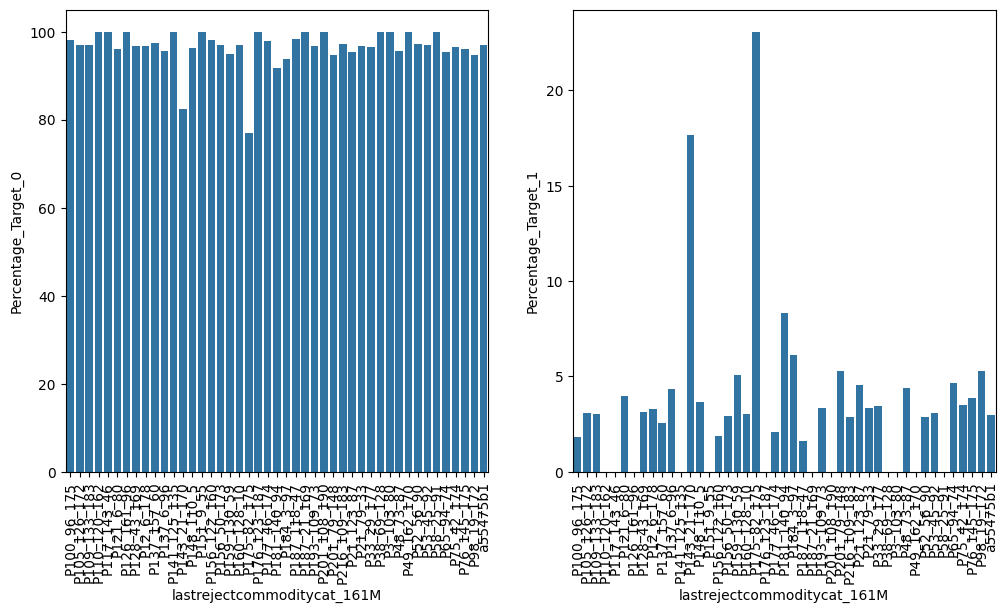

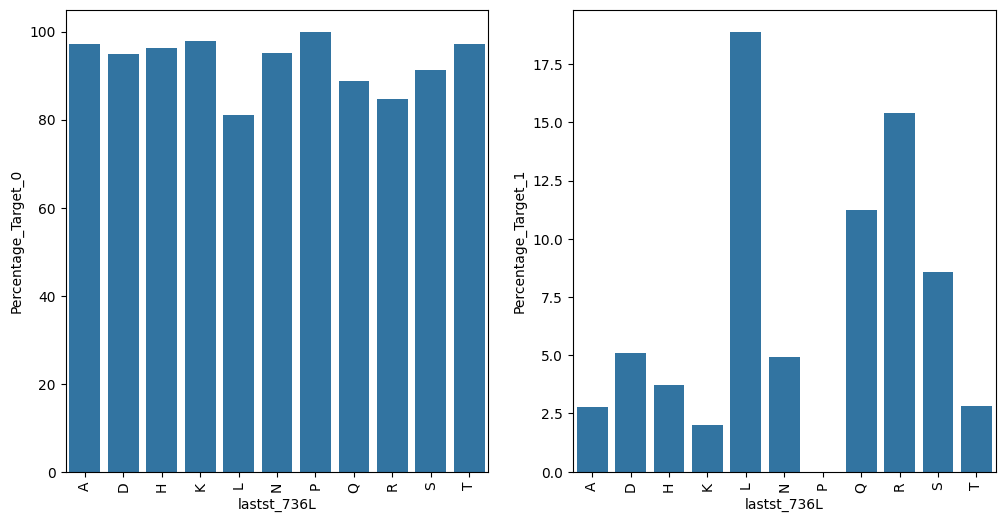

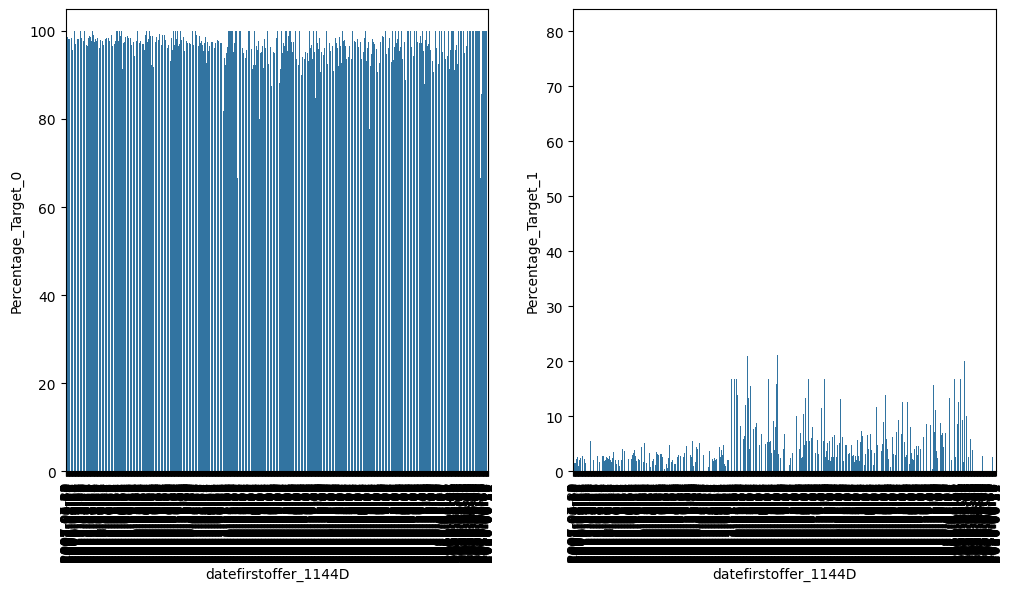

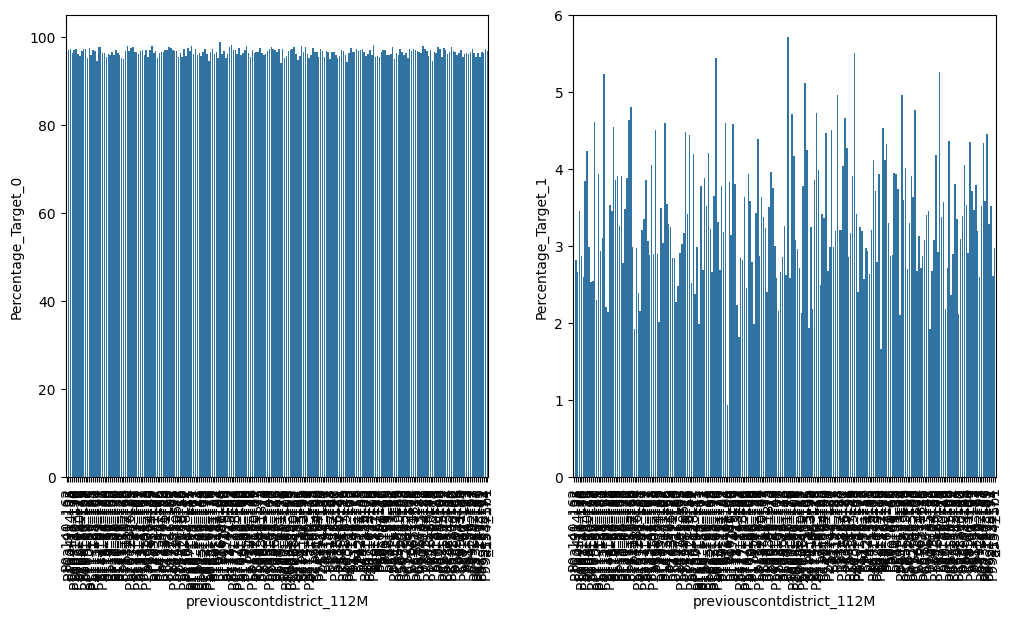

In [ ]:
catfeatures = ['date_decision','lastcancelreason_561M','lastdelinqdate_224D','firstclxcampaign_1125D','lastrejectcommoditycat_161M','lastst_736L','datefirstoffer_1144D','previouscontdistrict_112M']
cat_stats(train_m,catfeatures)

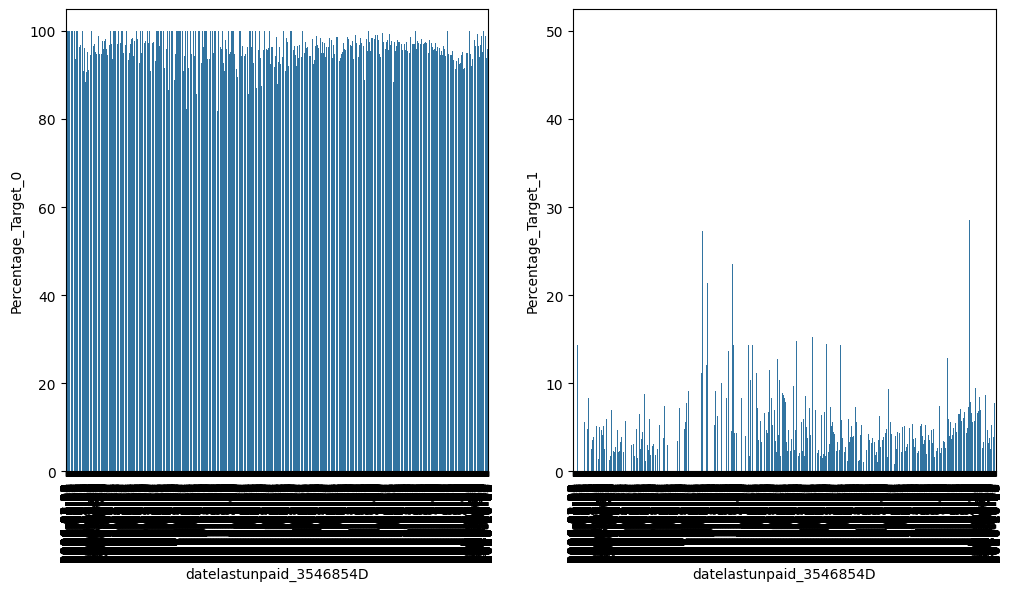

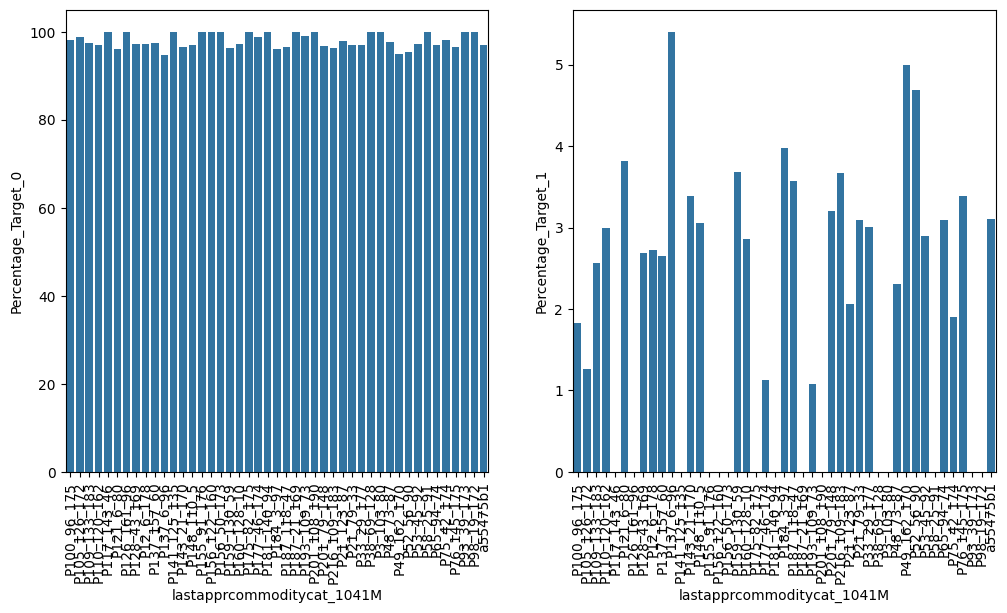

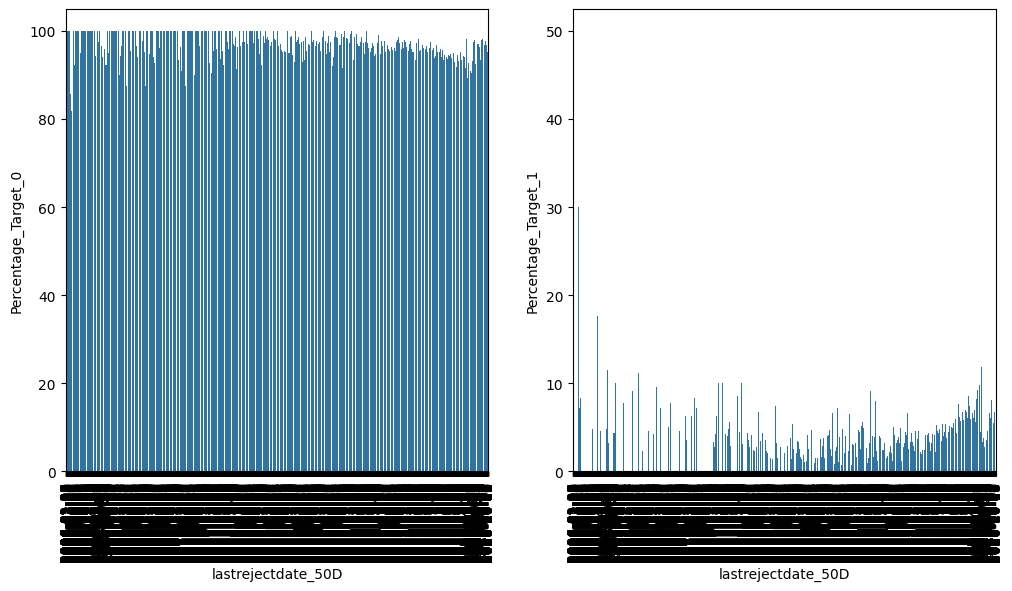

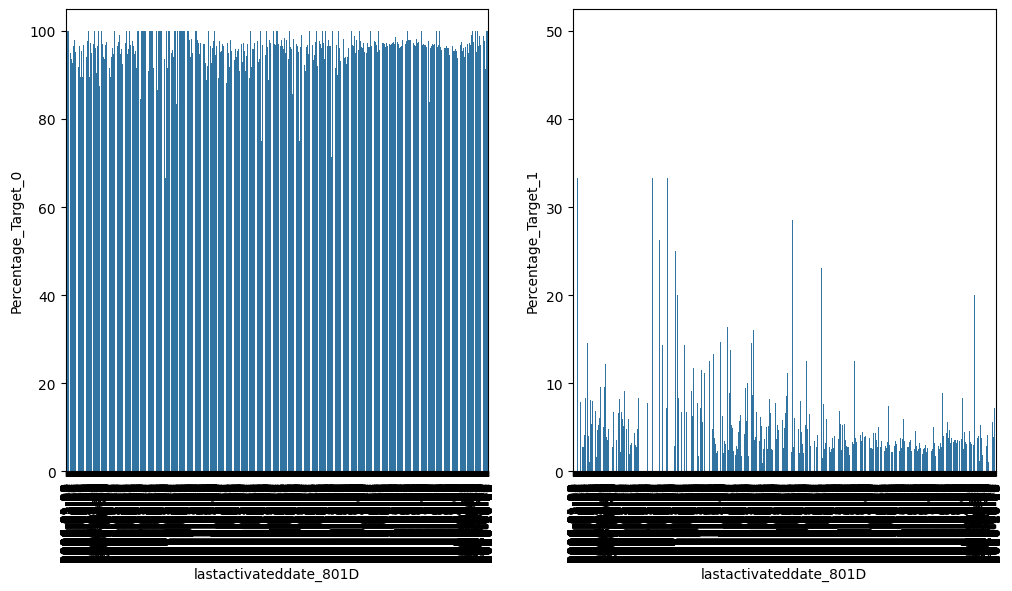

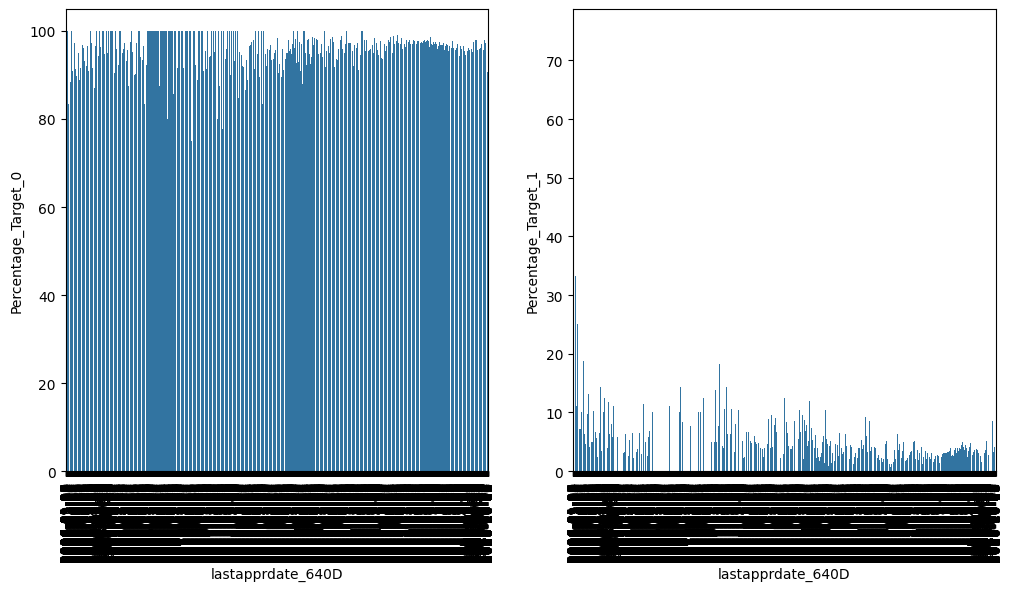

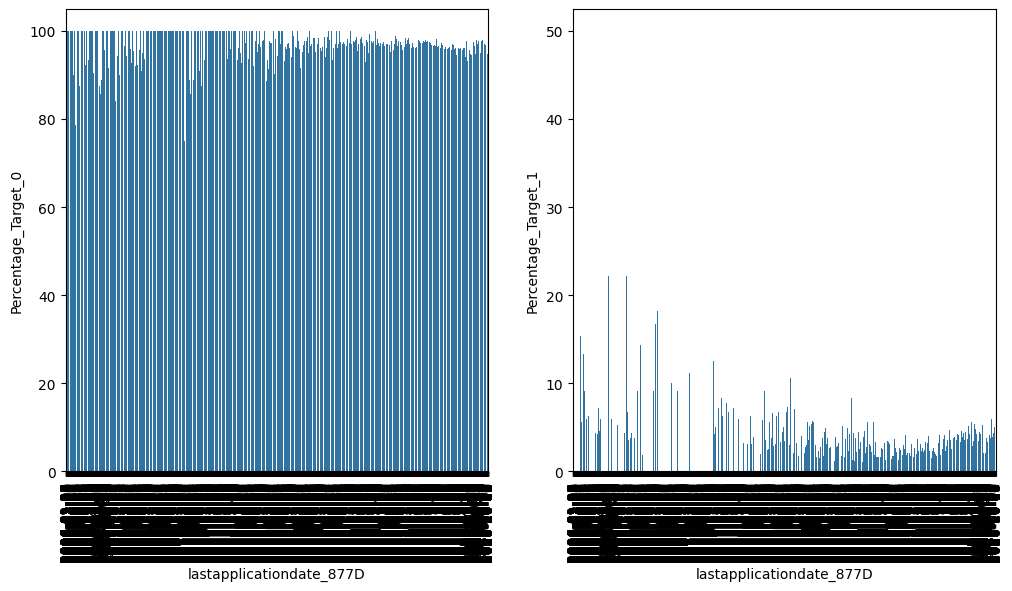

In [ ]:
catfeatures=['datelastunpaid_3546854D','lastapprcommoditycat_1041M','lastrejectdate_50D','lastactivateddate_801D','lastapprdate_640D','lastapplicationdate_877D']
cat_stats(train_m,catfeatures)

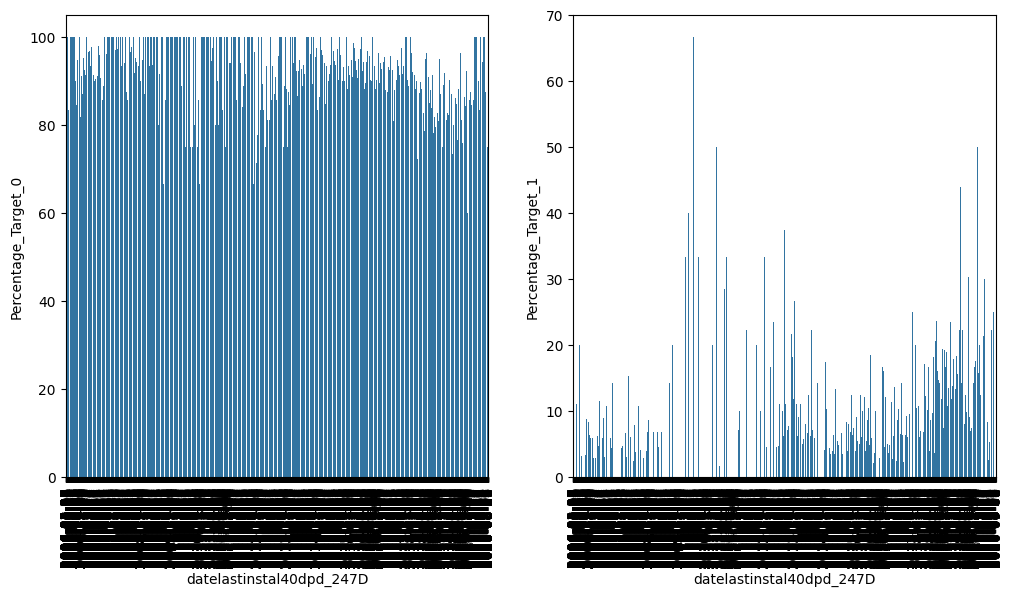

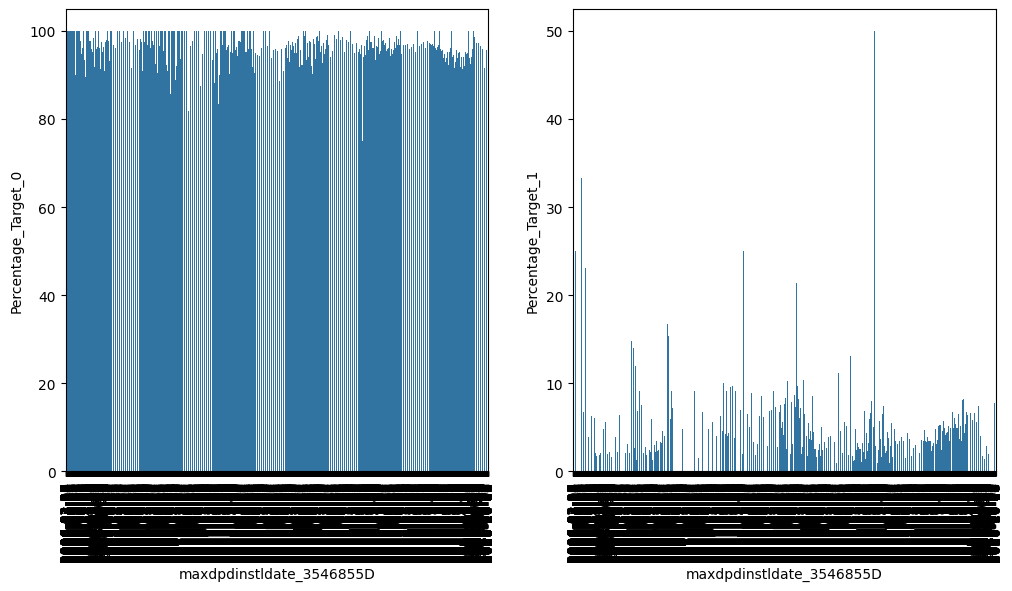

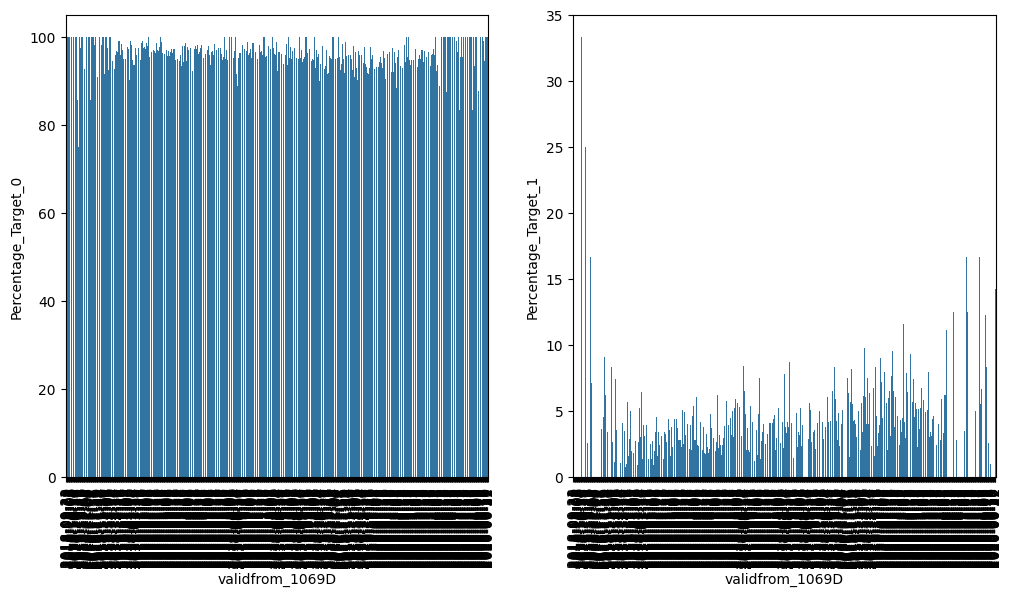

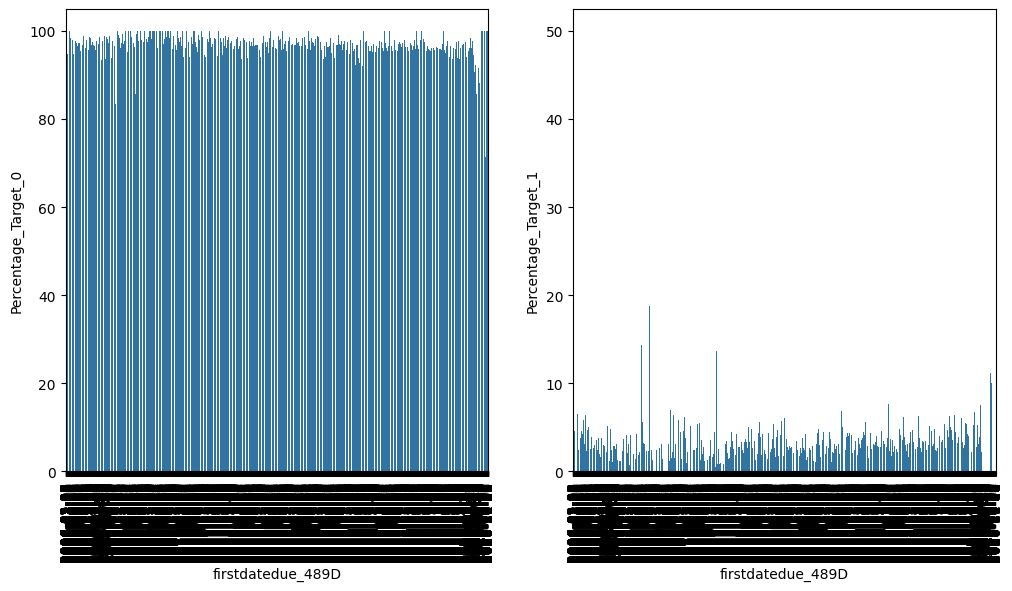

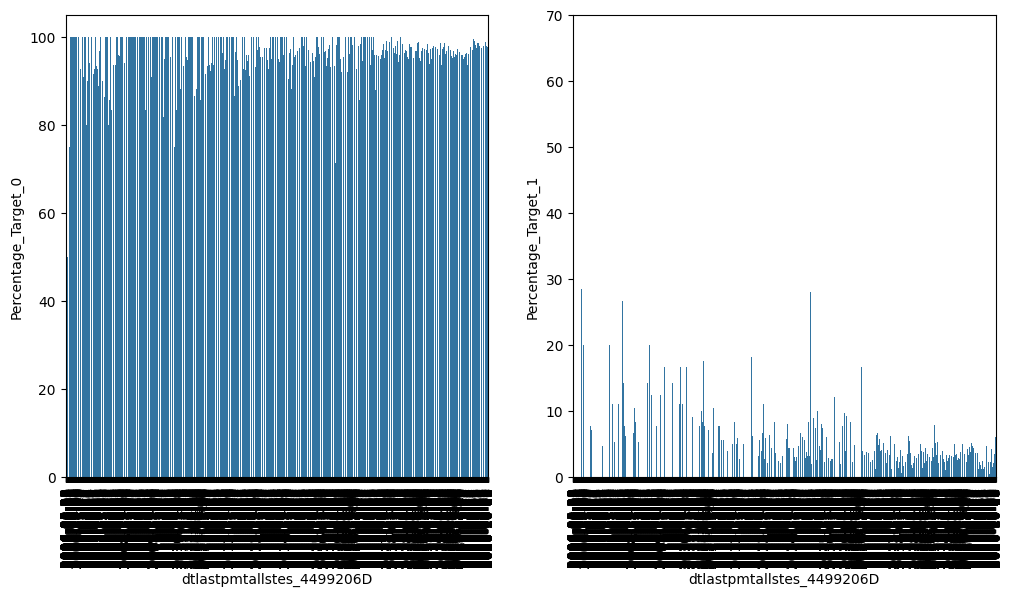

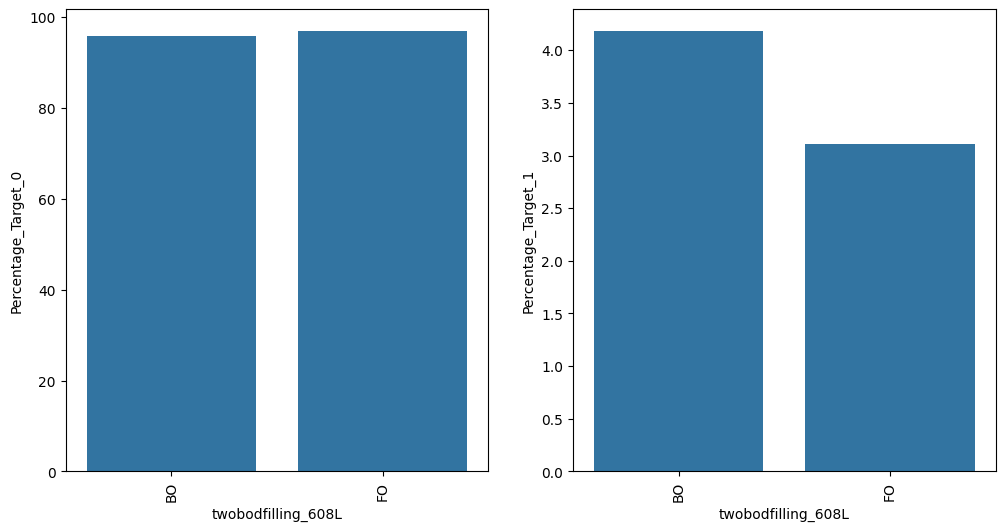

In [ ]:
cat_features=['datelastinstal40dpd_247D','maxdpdinstldate_3546855D','validfrom_1069D','firstdatedue_489D','dtlastpmtallstes_4499206D','twobodfilling_608L']
cat_stats(train_m,cat_features)
# twobodfilling_608L: FO(L) o.w.

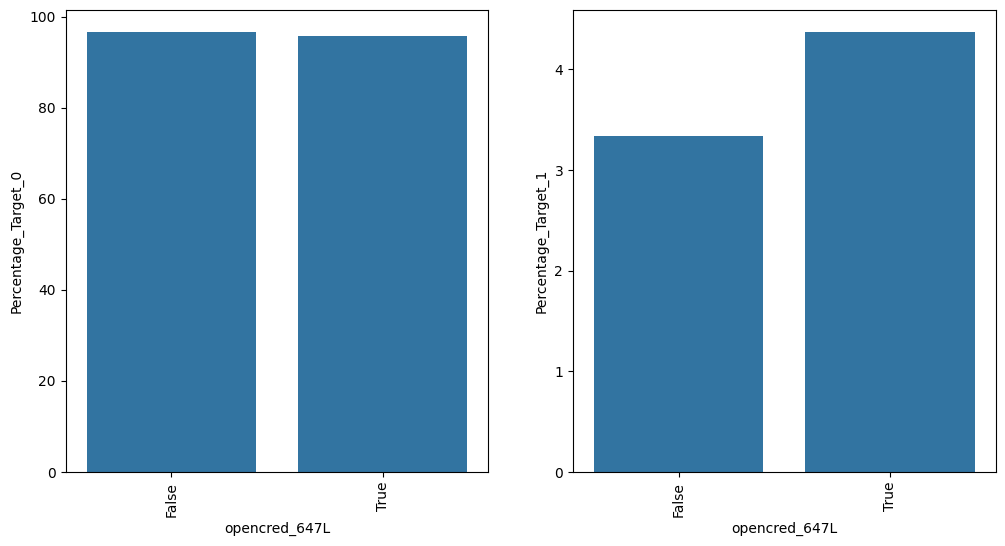

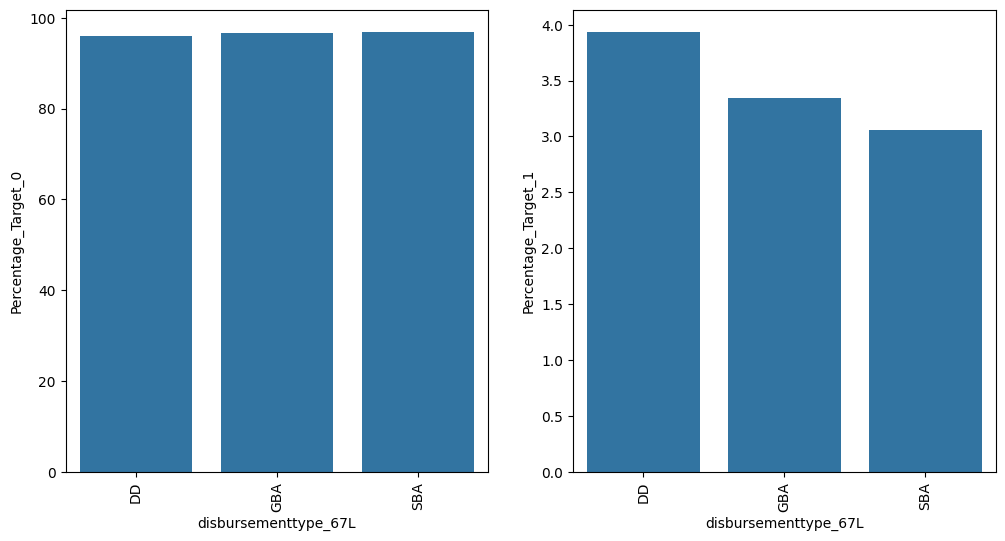

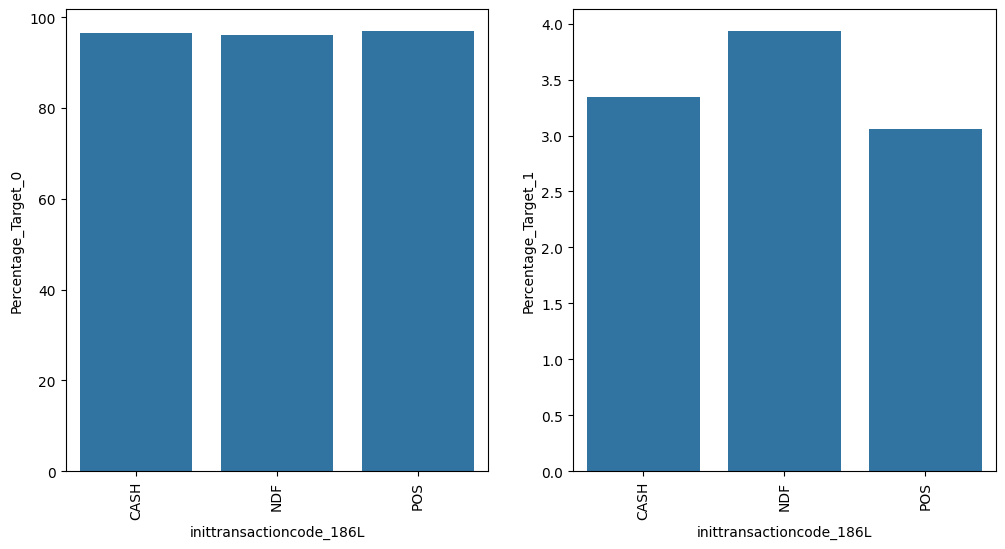

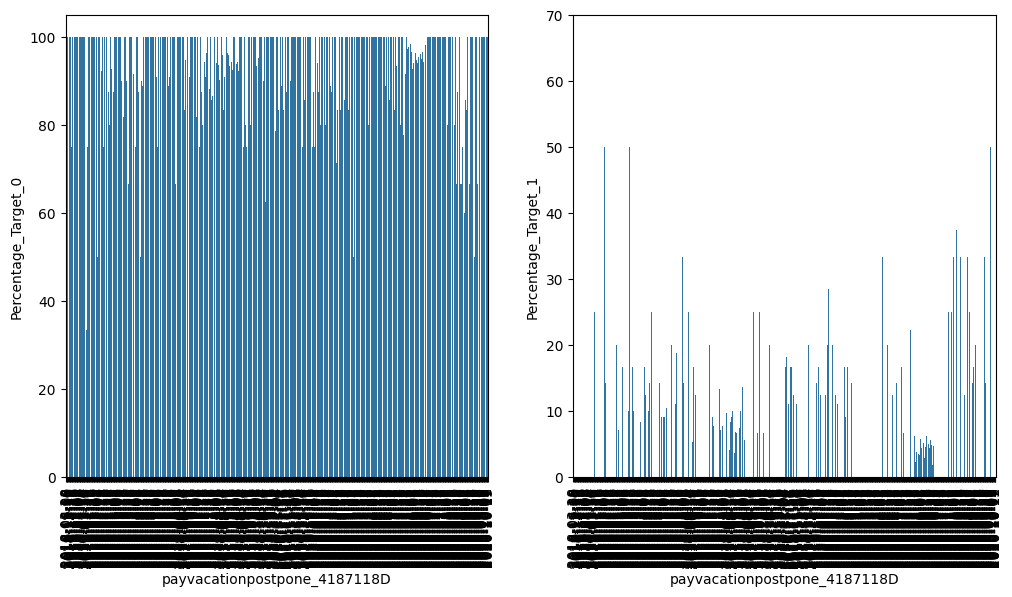

In [ ]:
cat_features2=['opencred_647L','disbursementtype_67L','inittransactioncode_186L','payvacationpostpone_4187118D']
cat_stats(train_m,cat_features2)
# opencred_647L: False(L)
# disbursementtype_67L: GBA(M), DD(H), o.w.
# inittransactioncode_186L: NDF(H), CASH(M), o.w.

In [20]:
def cat_stats_zoomin(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['target'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['target'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)

        fig, ax2 = plt.subplots(ncols=1, figsize=(12, 12))

        sns.set_color_codes("pastel")

        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

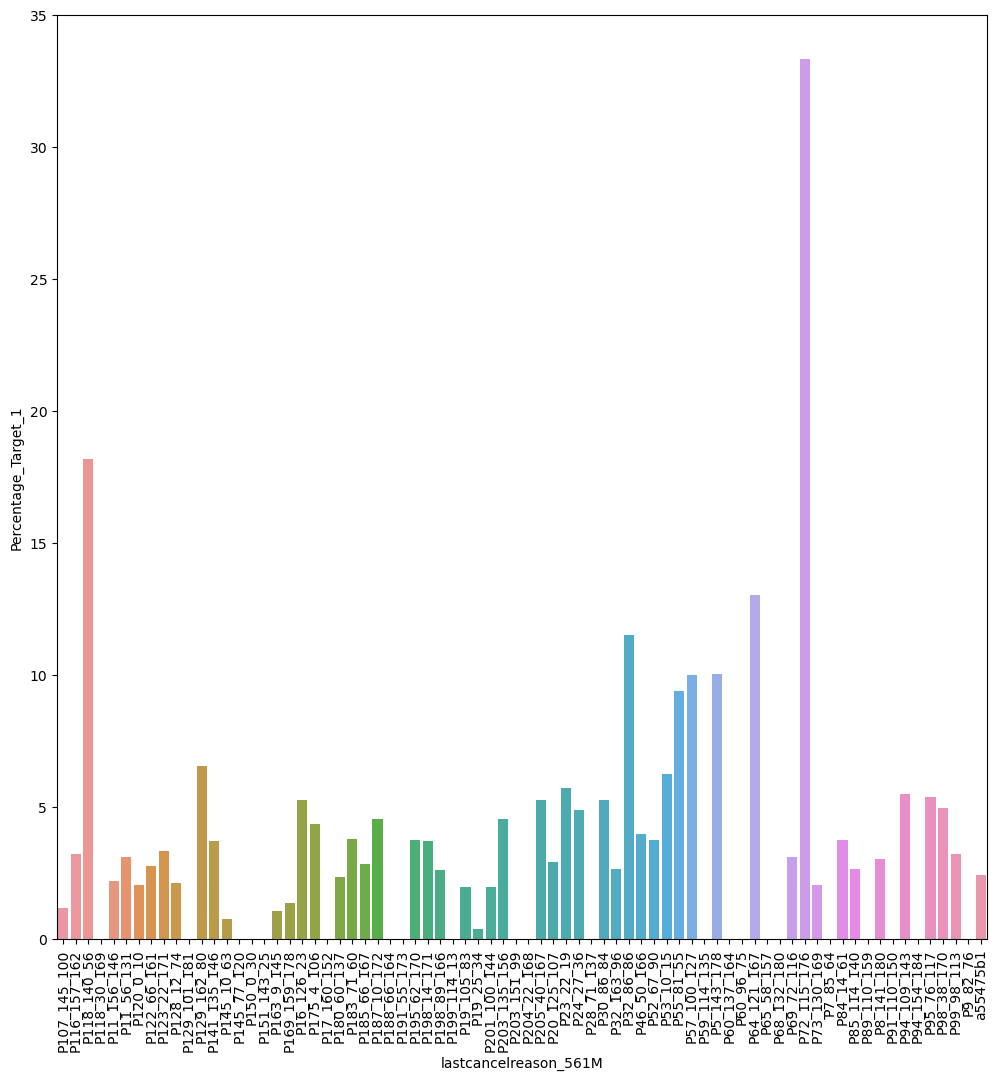

In [21]:
cat_stats_zoomin(train_m,['lastcancelreason_561M'])

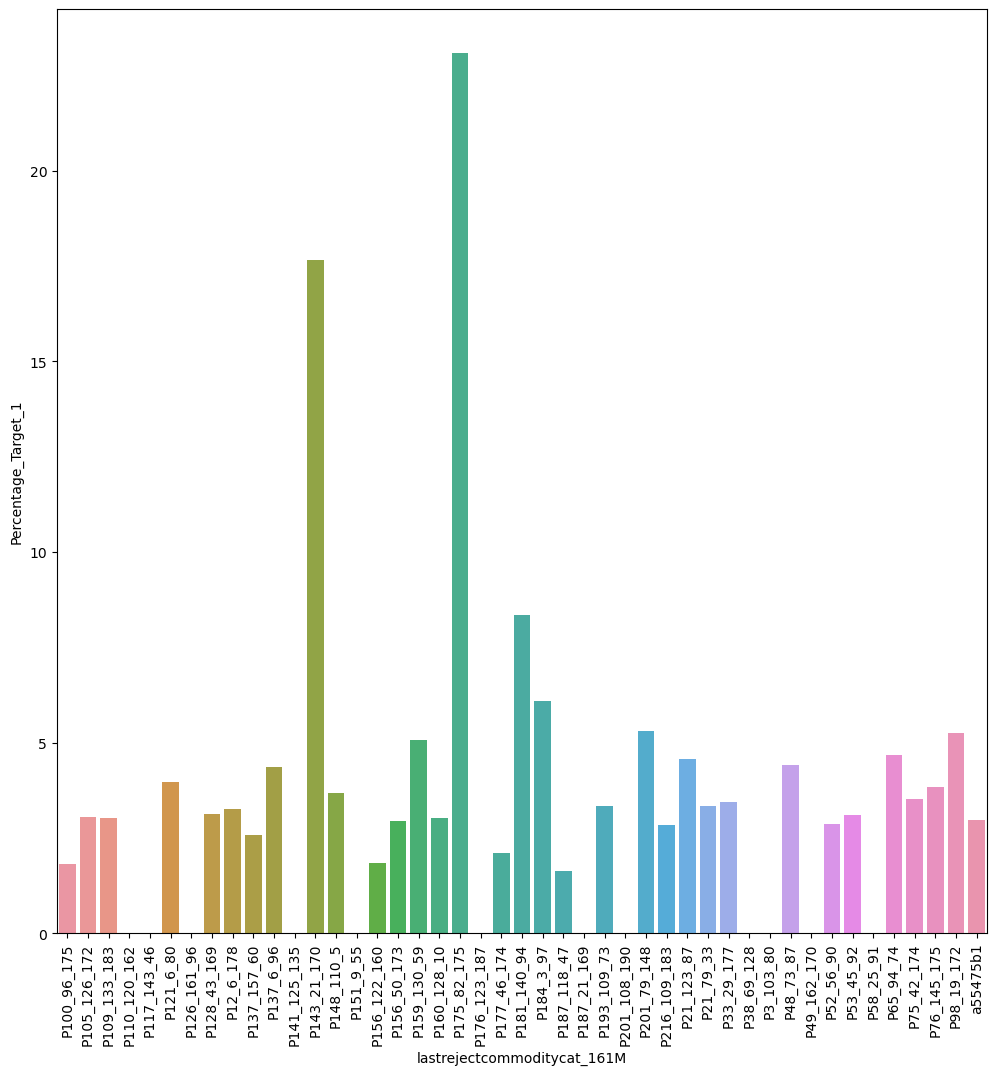

In [23]:
cat_stats_zoomin(train_m,['lastrejectcommoditycat_161M'])